In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgbm
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingclfressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
import optuna

import matplotlib.pyplot as plt
import seaborn as sns


import joblib
from pathlib import Path
from warnings import filterwarnings
filterwarnings('ignore')

/home/arma/miniforge3/envs/teachopencadd/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
HDAC1and6 = Path(HERE).resolve().parents[1]/'input'


In [3]:
df = pd.read_pickle(HDAC1and6/"HDAC1and6_1024B.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,SelectivityWindow
0,CHEMBL4159460,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[3213041, 3821889, 42902, 17455853, 2562256, 1...",-0.12
1,CHEMBL4250057,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1546832, 783386, 646233, 476717, 607926, 1860...",0.63
2,CHEMBL137875,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[5547132, 4188685, 8095127, 3724449, 7332227, ...",0.27
3,CHEMBL2442795,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5483437, 3005158, 245334, 933718, 2729629, 48...",0.35
4,CHEMBL3692676,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[2532187, 22954272, 8033062, 20297601, 1461017...",0.24


In [4]:
df_labeled = pd.read_csv(HDAC1and6/"HDAC1and6_dataset.csv", )
df_labeled

,molecule_chembl_id,smiles,type_HDAC1,Standard_Value_HDAC1,pChEMBL_HDAC1,type_HDAC6,Standard_Value_HDAC6,pChEMBL_HDAC6,SelectivityRatio,SelectivityWindow,label
0,CHEMBL4098975,O=C(CCCCCCC(=O)Nc1ccc(NCCCn2cc(-c3ncnc4[nH]ccc...,IC50,109.647820,6.96,IC50,0.141254,9.85,776.247117,2.89,HDAC6-selective
1,CHEMBL3912061,CS(=O)(=O)NCCc1cn(Cc2ccc(C(=O)NO)cc2)c2ccccc12,IC50,616.595002,6.21,IC50,0.169824,9.77,3630.780548,3.56,HDAC6-selective
2,CHEMBL4243347,O=C(CCCCCCC(=O)Nc1ccc(Nc2nc(-c3cn[nH]c3)c3cc[n...,IC50,1.995262,8.70,IC50,0.199526,9.70,10.000000,1.00,Dual-binder
3,CHEMBL4247128,C=CCCn1cc(-c2nc(Nc3ccc(NC(=O)CCCCCCC(=O)NO)cc3...,IC50,83.176377,7.08,IC50,0.251189,9.60,331.131122,2.52,HDAC6-selective
4,CHEMBL4126811,CC(C)(C)OC(=O)Nc1ccc(-c2cc(C(=O)NCc3ccc(C(=O)N...,IC50,436.515832,6.36,IC50,0.331131,9.48,1318.256739,3.12,HDAC6-selective
...,...,...,...,...,...,...,...,...,...,...,...
1334,CHEMBL4278591,CC(=O)Nc1ccc(-c2ccnc(Nc3cccc(OCCCCCCCC(=O)NO)c...,IC50,1047.128548,5.98,IC50,6.760830,8.17,154.881662,2.19,HDAC6-selective
1335,CHEMBL4649511,O=C(CCCCCCCNc1nc2cc(C(=O)O)ccc2c2cnccc12)NO,IC50,3.311311,8.48,IC50,12.882496,7.89,0.257040,-0.59,Dual-binder
1336,CHEMBL4291781,CC(=O)Nc1ccc(-c2ccnc(Nc3ccc(OCCCCCCCC(=O)NO)cc...,IC50,1698.243652,5.77,IC50,14.125375,7.85,120.226444,2.08,HDAC6-selective
1337,CHEMBL3215861,CCCCc1nc2cc(/C=C/C(=O)NO)ccc2n1CCN(CC)CC,Ki,28.183829,7.55,Ki,245.470892,6.61,0.114815,-0.94,Dual-binder


In [5]:
df = pd.merge(df, df_labeled[['molecule_chembl_id',  'label']], on='molecule_chembl_id')

In [6]:
df[df['label'] == 'Dual-binder']['SelectivityWindow'].max()

1.0

In [7]:
#df['Classes'] = np.where(df['label']== 'hDAC1-selective', 2)
df['Class'] = np.zeros(len(df))

df.loc[df[df.label == 'hDAC1-selective'].index, "Class"] = 1.0
df.loc[df[df.label == 'hDAC6-selective'].index, "Class"] = 2.0
df.loc[df[df.label == 'Dual-binder'].index, "Class"] = 3.0
df.loc[df[df.label == 'Non-binder'].index, "Class"] = 4.0
df.loc[df[df.label == 'Semi-selective'].index, "Class"] = 5.0
df.head(4)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,SelectivityWindow,label,Class
0,CHEMBL4159460,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[3213041, 3821889, 42902, 17455853, 2562256, 1...",-0.12,Dual-binder,3.0
1,CHEMBL4250057,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1546832, 783386, 646233, 476717, 607926, 1860...",0.63,Non-binder,4.0
2,CHEMBL137875,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[5547132, 4188685, 8095127, 3724449, 7332227, ...",0.27,Non-binder,4.0
3,CHEMBL2442795,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5483437, 3005158, 245334, 933718, 2729629, 48...",0.35,Dual-binder,3.0


In [8]:
# Add column for selectivity
df["selectivity"] = np.zeros(len(df))

# Mark every molecule as selective if SelectivityWindow is >=2 or >=-2, 0 otherwise
df.loc[df[df.SelectivityWindow >= 2.0].index, "selectivity"] = 1.0
df.loc[df[df.SelectivityWindow <= -2.0].index, "selectivity"] = 1.0
#By using Morgan fingerprints with radius of 3 and 1024 bits
indices =  np.array(df.index)
X = np.array(list((df['fp_Morgan3']))).astype(float)
#X.shape
Y =  df["selectivity"].values
Y_class = df['Class'].values

In [9]:
NUMS = 10
random_state= [146736, 1367, 209056, 1847464, 89563, 967034, 3689, 689547, 578929, 7458910]
X_tr_all = []
Y_tr_all = []
X_te_all = []
Y_te_all = []
Y_tr_class_all = []
Y_te_class_all = []
index_tr_all= []
index_te_all = []

for i in range(NUMS):
    X_tr, X_te, Y_tr, Y_te, Y_tr_class, Y_te_class, index_tr, index_te = train_test_split(X, Y, Y_class,indices, test_size=0.2, random_state=random_state[i], stratify=Y_class)
    X_tr_all.append(X_tr)
    Y_tr_all.append(Y_tr)
    X_te_all.append(X_te)
    Y_te_all.append(Y_te)
    Y_tr_class_all.append(Y_tr_class)
    Y_te_class_all.append(Y_te_class)
    index_tr_all.append(index_tr)
    index_te_all.append(index_te)
globals_dict = globals()
    
for i in range(0, len(index_te_all)):
    globals_dict[f"trainSet{i}"] = df.iloc[index_tr_all[i]]
    globals_dict[f"testSet{i}"] = df.iloc[index_te_all[i]]
    globals_dict[f"trainindex{i}"] = df.index[index_tr_all[i]]
    globals_dict[f"testindex{i}"] = df.index[index_te_all[i]]  
    globals_dict[f"X_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['selectivity'])).astype(float)
    
    globals_dict[f"Y_trainSet{i}_class"] = np.array(list(df.iloc[index_tr_all[i]]['Class'])).astype(float)
    globals_dict[f"X_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['selectivity'])).astype(float)
    
    globals_dict[f"Y_testSet{i}_class"] = np.array(list(df.iloc[index_te_all[i]]['Class'])).astype(float)
    

In [10]:
import sklearn.metrics
import math

def matrix_metrix(real_values,pred_values,beta):

    CM = confusion_matrix(real_values,pred_values)
    TN = CM[0][0]
    FN = CM[1][0] 
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN+FN+TP+FP
    Prevalence = round( (TP+FP) / Population,2)
    Accuracy   = round( (TP+TN) / Population,4)
    Precision  = round( TP / (TP+FP),4 )
    NPV        = round( TN / (TN+FN),4 )
    FDR        = round( FP / (TP+FP),4 )
    FOR        = round( FN / (TN+FN),4 ) 
    check_Pos  = Precision + FDR
    check_Neg  = NPV + FOR
    Recall     = round( TP / (TP+FN),4 )
    FPR        = round( FP / (TN+FP),4 )
    FNR        = round( FN / (TP+FN),4 )
    TNR        = round( TN / (TN+FP),4 ) 
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos      = round( Recall/FPR,4 ) 
    LRNeg      = round( FNR / TNR ,4 )
    DOR        = round( LRPos/LRNeg)
    BalancedAccuracy = round( 0.5*(Recall+TNR),4)
    F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)   
    F1_weighted = round(f1_score(real_values, pred_values, average="weighted"), 4)
    F1_micro = round(f1_score(real_values, pred_values, average="micro"), 4)
    F1_macro = round(f1_score(real_values, pred_values, average="macro"), 4)
    FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
    MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
    BM         = Recall+TNR-1
    MK         = Precision+NPV-1

    mat_met = pd.DataFrame({
    'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos',
              'check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','BalancedAccuracy',
              'F1','F1_weighted','F1_micro', 'F1_macro', 'FBeta','MCC','BM','MK'],     
    'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,BalancedAccuracy,F1,F1_weighted,F1_micro, F1_macro, FBeta,MCC,BM,MK]})  
    return (mat_met)


## Random Forest 

In [11]:
%%time

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)


for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        rf_clf =  RandomForestClassifier(random_state=1121218, max_features = None, n_jobs=8,oob_score=True,
                                           max_samples=0.8, )
        rf_clf.fit(x_train, y_train)
        y_pred = rf_clf.predict(x_test)  
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)



mat_met_rf = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
                    
print(mat_met_rf)

                 Metric  Value (average)  Value (std)
0                    TP        25.500000     2.677063
1                    TN        96.400000     2.716207
2                    FP         4.100000     2.558211
3                    FN         7.900000     2.685351
4              Accuracy         0.910380     0.031269
5             Precision         0.864992     0.082081
6           Sensitivity         0.763601     0.080124
7           Specificity         0.959190     0.025511
8              F1 score         0.809035     0.068394
9   F1 score (weighted)         0.908372     0.032170
10     F1 score (macro)         0.875213     0.044224
11    Balanced Accuracy         0.861394     0.045325
12                  MCC         0.754946     0.088374
13                  NPV         0.924620     0.024289
14              ROC_AUC         0.861394     0.045325
CPU times: user 43.6 s, sys: 108 ms, total: 43.7 s
Wall time: 6.85 s


In [12]:
import optuna  


def objective_rf_CV(trial, X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggestegorical("max_features", [None]),
    #oob_score = trial.suggestegorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    

    cv_scores = np.empty(10)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        rf = RandomForestClassifier(**param_grid, n_jobs=8, random_state=1121218, max_features = None, 
                                   oob_score=True,
                                   max_samples=0.8,) 
        
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        cv_scores[idx] = f1_score(y_test, y_pred,  average="macro")
      
    
    return np.mean(cv_scores)

In [13]:
def detailed_objective_rf_CV(trial,X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggestegorical("max_features", [None]),
    #oob_score = trial.suggestegorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    
    
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        rf = RandomForestClassifier(**param_grid, n_jobs=8, random_state=1121218, max_features = None, oob_score=True,
                                           max_samples=0.8,)
   
        #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test, y_pred)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)

    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)
    
  

In [14]:
#Execute optuna and set hyperparameters
study_rf = optuna.create_study(direction='maximize', study_name="RFclassifier")
func_rf_0 = lambda trial: objective_rf_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_rf.optimize(func_rf_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 07:52:41,070] A new study created in memory with name: RFclassifier
[I 2023-12-05 07:53:04,968] Trial 0 finished with value: 0.865084916877071 and parameters: {'n_estimators': 508}. Best is trial 0 with value: 0.865084916877071.
[I 2023-12-05 07:53:32,125] Trial 1 finished with value: 0.8624387485044653 and parameters: {'n_estimators': 566}. Best is trial 0 with value: 0.865084916877071.
[I 2023-12-05 07:53:42,085] Trial 2 finished with value: 0.8590594560214253 and parameters: {'n_estimators': 185}. Best is trial 0 with value: 0.865084916877071.
[I 2023-12-05 07:54:23,535] Trial 3 finished with value: 0.861378427408618 and parameters: {'n_estimators': 802}. Best is trial 0 with value: 0.865084916877071.
[I 2023-12-05 07:55:01,200] Trial 4 finished with value: 0.865084916877071 and parameters: {'n_estimators': 733}. Best is trial 0 with value: 0.865084916877071.
[I 2023-12-05 07:55:45,949] Trial 5 finished with value: 0.8640245957812238 and parameters: {'n_estimators': 87

	Number of trials: 50.0
	Best value (f1_score): 0.8651
	Best params:
		n_estimators: 508


In [15]:
optimized_rf_0 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
 
data_testing = pd.DataFrame()    
    
optimized_rf_0.fit(X_trainSet0, Y_trainSet0,)

#predict        
y_pred_rf_0 = optimized_rf_0.predict(X_testSet0)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_rf_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_rf_0)
Precision = precision_score(Y_testSet0, y_pred_rf_0)
Sensitivity = recall_score(Y_testSet0, y_pred_rf_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_rf_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_rf_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_rf_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_rf_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_rf_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_rf_0)
data_testing['y_test_idx0'] = testindex0
data_testing['y_test_Set0'] = Y_testSet0
data_testing['y_pred_Set0'] = y_pred_rf_0


mat_met_rf_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(TP), np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                           np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_rf_test)


                 Metric        Set0
0                    TP   44.000000
1                    TN  195.000000
2                    FP    4.000000
3                    FN   25.000000
4              Accuracy    0.891791
5             Precision    0.916667
6           Sensitivity    0.637681
7           Specificity    0.979900
8              F1 score    0.752137
9   F1 score (weighted)    0.884792
10     F1 score (macro)    0.841462
11    Balanced Accuracy    0.808790
12                  MCC    0.704227
13                  NPV    0.886400
14              ROC_AUC    0.808790


In [16]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_1 = lambda trial: objective_rf_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_rf.optimize(func_rf_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 08:16:15,235] Trial 50 finished with value: 0.8754500915084371 and parameters: {'n_estimators': 670}. Best is trial 50 with value: 0.8754500915084371.
[I 2023-12-05 08:16:50,824] Trial 51 finished with value: 0.8770455922498069 and parameters: {'n_estimators': 673}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 08:17:26,507] Trial 52 finished with value: 0.8754500915084371 and parameters: {'n_estimators': 674}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 08:18:01,782] Trial 53 finished with value: 0.8770455922498069 and parameters: {'n_estimators': 665}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 08:18:37,482] Trial 54 finished with value: 0.8770455922498069 and parameters: {'n_estimators': 673}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 08:19:12,987] Trial 55 finished with value: 0.8770455922498069 and parameters: {'n_estimators': 671}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12

	Number of trials: 100.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


In [17]:
optimized_rf_1 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_1.fit(X_trainSet1, Y_trainSet1,)

#predict        
y_pred_rf_1 = optimized_rf_1.predict(X_testSet1)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_rf_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_rf_1)
Precision = precision_score(Y_testSet1, y_pred_rf_1)
Sensitivity = recall_score(Y_testSet1, y_pred_rf_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_rf_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_rf_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_rf_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_rf_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_rf_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_rf_1)
data_testing['y_test_idx1'] = testindex1
data_testing['y_test_Set1'] = Y_testSet1
data_testing['y_pred_Set1'] = y_pred_rf_1


set1 = pd.DataFrame({ 'Set1':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set1'] =set1
print(mat_met_rf_test)


                 Metric        Set0        Set1
0                    TP   44.000000   44.000000
1                    TN  195.000000  191.000000
2                    FP    4.000000    9.000000
3                    FN   25.000000   24.000000
4              Accuracy    0.891791    0.876866
5             Precision    0.916667    0.830189
6           Sensitivity    0.637681    0.647059
7           Specificity    0.979900    0.955000
8              F1 score    0.752137    0.727273
9   F1 score (weighted)    0.884792    0.871459
10     F1 score (macro)    0.841462    0.823877
11    Balanced Accuracy    0.808790    0.801029
12                  MCC    0.704227    0.657735
13                  NPV    0.886400    0.888400
14              ROC_AUC    0.808790    0.801029


In [18]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_2 = lambda trial: objective_rf_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_rf.optimize(func_rf_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 08:45:47,802] Trial 100 finished with value: 0.864127300024353 and parameters: {'n_estimators': 714}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 08:46:21,613] Trial 101 finished with value: 0.8625604740505635 and parameters: {'n_estimators': 642}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 08:46:56,064] Trial 102 finished with value: 0.8625604740505635 and parameters: {'n_estimators': 655}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 08:47:31,406] Trial 103 finished with value: 0.864127300024353 and parameters: {'n_estimators': 673}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 08:48:23,474] Trial 104 finished with value: 0.864127300024353 and parameters: {'n_estimators': 991}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 08:48:55,666] Trial 105 finished with value: 0.8626553782179365 and parameters: {'n_estimators': 610}. Best is trial 51 with value: 0.8770455922498069.
[I 2023

	Number of trials: 150.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


In [19]:

optimized_rf_2 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_2.fit(X_trainSet2, Y_trainSet2,)

#predict        
y_pred_rf_2 = optimized_rf_2.predict(X_testSet2)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_rf_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_rf_2)
Precision = precision_score(Y_testSet2, y_pred_rf_2)
Sensitivity = recall_score(Y_testSet2, y_pred_rf_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_rf_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_rf_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_rf_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_rf_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_rf_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_rf_2)
data_testing['y_test_idx2'] = testindex2
data_testing['y_test_Set2'] = Y_testSet2
data_testing['y_pred_Set2'] = y_pred_rf_2

set2 = pd.DataFrame({'Set2':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set2'] =set2
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2
0                    TP   44.000000   44.000000   48.000000
1                    TN  195.000000  191.000000  195.000000
2                    FP    4.000000    9.000000    6.000000
3                    FN   25.000000   24.000000   19.000000
4              Accuracy    0.891791    0.876866    0.906716
5             Precision    0.916667    0.830189    0.888889
6           Sensitivity    0.637681    0.647059    0.716418
7           Specificity    0.979900    0.955000    0.970100
8              F1 score    0.752137    0.727273    0.793388
9   F1 score (weighted)    0.884792    0.871459    0.903166
10     F1 score (macro)    0.841462    0.823877    0.866574
11    Balanced Accuracy    0.808790    0.801029    0.843284
12                  MCC    0.704227    0.657735    0.741165
13                  NPV    0.886400    0.888400    0.911200
14              ROC_AUC    0.808790    0.801029    0.843284


In [20]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_3 = lambda trial: objective_rf_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_rf.optimize(func_rf_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 09:14:41,672] Trial 150 finished with value: 0.8688256188576297 and parameters: {'n_estimators': 691}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:15:14,523] Trial 151 finished with value: 0.8703346614990766 and parameters: {'n_estimators': 650}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:15:48,362] Trial 152 finished with value: 0.8688256188576297 and parameters: {'n_estimators': 669}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:16:20,741] Trial 153 finished with value: 0.8703346614990766 and parameters: {'n_estimators': 640}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:16:51,080] Trial 154 finished with value: 0.8703346614990766 and parameters: {'n_estimators': 599}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:17:26,454] Trial 155 finished with value: 0.8688256188576297 and parameters: {'n_estimators': 700}. Best is trial 51 with value: 0.8770455922498069.
[I 2

	Number of trials: 200.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


In [21]:
optimized_rf_3 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_3.fit(X_trainSet3, Y_trainSet3,)

#predict        
y_pred_rf_3 = optimized_rf_3.predict(X_testSet3)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_rf_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_rf_3)
Precision = precision_score(Y_testSet3, y_pred_rf_3)
Sensitivity = recall_score(Y_testSet3, y_pred_rf_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_rf_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_rf_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_rf_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_rf_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_rf_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_rf_3)
data_testing['y_test_idx3'] = testindex3
data_testing['y_test_Set3'] = Y_testSet3
data_testing['y_pred_Set3'] = y_pred_rf_3


set3 = pd.DataFrame({'Set3':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set3'] =set3   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   44.000000   44.000000   48.000000   48.000000
1                    TN  195.000000  191.000000  195.000000  191.000000
2                    FP    4.000000    9.000000    6.000000    8.000000
3                    FN   25.000000   24.000000   19.000000   21.000000
4              Accuracy    0.891791    0.876866    0.906716    0.891791
5             Precision    0.916667    0.830189    0.888889    0.857143
6           Sensitivity    0.637681    0.647059    0.716418    0.695652
7           Specificity    0.979900    0.955000    0.970100    0.959800
8              F1 score    0.752137    0.727273    0.793388    0.768000
9   F1 score (weighted)    0.884792    0.871459    0.903166    0.887876
10     F1 score (macro)    0.841462    0.823877    0.866574    0.848720
11    Balanced Accuracy    0.808790    0.801029    0.843284    0.827726
12                  MCC    0.704227    0.657735    0.741165    0

In [22]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_4 = lambda trial: objective_rf_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_rf.optimize(func_rf_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 09:42:03,553] Trial 200 finished with value: 0.8656183270733099 and parameters: {'n_estimators': 617}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:42:38,249] Trial 201 finished with value: 0.8656183270733099 and parameters: {'n_estimators': 642}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:43:12,104] Trial 202 finished with value: 0.8641892870449087 and parameters: {'n_estimators': 625}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:43:48,158] Trial 203 finished with value: 0.8641892870449087 and parameters: {'n_estimators': 664}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:44:21,040] Trial 204 finished with value: 0.8641892870449087 and parameters: {'n_estimators': 606}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 09:44:55,812] Trial 205 finished with value: 0.8656183270733099 and parameters: {'n_estimators': 644}. Best is trial 51 with value: 0.8770455922498069.
[I 2

	Number of trials: 250.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


In [23]:
optimized_rf_4 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_4.fit(X_trainSet4, Y_trainSet4,)

#predict        
y_pred_rf_4 = optimized_rf_4.predict(X_testSet4)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_rf_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_rf_4)
Precision = precision_score(Y_testSet4, y_pred_rf_4)
Sensitivity = recall_score(Y_testSet4, y_pred_rf_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_rf_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_rf_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_rf_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_rf_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_rf_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_rf_4)
data_testing['y_test_idx4'] = testindex4
data_testing['y_test_Set4'] = Y_testSet4
data_testing['y_pred_Set4'] = y_pred_rf_4

set4 = pd.DataFrame({'Set4':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set4'] =set4   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   44.000000   48.000000   48.000000   
1                    TN  195.000000  191.000000  195.000000  191.000000   
2                    FP    4.000000    9.000000    6.000000    8.000000   
3                    FN   25.000000   24.000000   19.000000   21.000000   
4              Accuracy    0.891791    0.876866    0.906716    0.891791   
5             Precision    0.916667    0.830189    0.888889    0.857143   
6           Sensitivity    0.637681    0.647059    0.716418    0.695652   
7           Specificity    0.979900    0.955000    0.970100    0.959800   
8              F1 score    0.752137    0.727273    0.793388    0.768000   
9   F1 score (weighted)    0.884792    0.871459    0.903166    0.887876   
10     F1 score (macro)    0.841462    0.823877    0.866574    0.848720   
11    Balanced Accuracy    0.808790    0.801029    0.843284    0.827726   
12                  MCC  

In [24]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_5 = lambda trial: objective_rf_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_rf.optimize(func_rf_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 10:10:46,136] Trial 250 finished with value: 0.8612726806711833 and parameters: {'n_estimators': 612}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:11:22,414] Trial 251 finished with value: 0.8613377130864599 and parameters: {'n_estimators': 671}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:11:57,511] Trial 252 finished with value: 0.8623240568624047 and parameters: {'n_estimators': 651}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:12:31,494] Trial 253 finished with value: 0.8623240568624047 and parameters: {'n_estimators': 629}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:13:04,301] Trial 254 finished with value: 0.8612726806711833 and parameters: {'n_estimators': 606}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:13:39,838] Trial 255 finished with value: 0.8623240568624047 and parameters: {'n_estimators': 656}. Best is trial 51 with value: 0.8770455922498069.
[I 2

	Number of trials: 300.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


In [25]:
optimized_rf_5 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_5.fit(X_trainSet5, Y_trainSet5,)

#predict        
y_pred_rf_5 = optimized_rf_5.predict(X_testSet5)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_rf_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_rf_5)
Precision = precision_score(Y_testSet5, y_pred_rf_5)
Sensitivity = recall_score(Y_testSet5, y_pred_rf_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_rf_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_rf_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_rf_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_rf_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_rf_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_rf_5)
data_testing['y_test_idx5'] = testindex5
data_testing['y_test_Set5'] = Y_testSet5
data_testing['y_pred_Set5'] = y_pred_rf_5


Set5 = pd.DataFrame({'Set5':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set5'] =Set5   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   44.000000   48.000000   48.000000   
1                    TN  195.000000  191.000000  195.000000  191.000000   
2                    FP    4.000000    9.000000    6.000000    8.000000   
3                    FN   25.000000   24.000000   19.000000   21.000000   
4              Accuracy    0.891791    0.876866    0.906716    0.891791   
5             Precision    0.916667    0.830189    0.888889    0.857143   
6           Sensitivity    0.637681    0.647059    0.716418    0.695652   
7           Specificity    0.979900    0.955000    0.970100    0.959800   
8              F1 score    0.752137    0.727273    0.793388    0.768000   
9   F1 score (weighted)    0.884792    0.871459    0.903166    0.887876   
10     F1 score (macro)    0.841462    0.823877    0.866574    0.848720   
11    Balanced Accuracy    0.808790    0.801029    0.843284    0.827726   
12                  MCC  

In [26]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_6 = lambda trial: objective_rf_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_rf.optimize(func_rf_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 10:39:14,743] Trial 300 finished with value: 0.8528502424999364 and parameters: {'n_estimators': 719}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:39:50,183] Trial 301 finished with value: 0.8539437021803525 and parameters: {'n_estimators': 666}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:40:24,561] Trial 302 finished with value: 0.8539437021803525 and parameters: {'n_estimators': 646}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:40:56,545] Trial 303 finished with value: 0.8528600837925119 and parameters: {'n_estimators': 601}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:41:29,920] Trial 304 finished with value: 0.8528600837925119 and parameters: {'n_estimators': 626}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 10:42:06,369] Trial 305 finished with value: 0.8539437021803525 and parameters: {'n_estimators': 681}. Best is trial 51 with value: 0.8770455922498069.
[I 2

	Number of trials: 350.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


In [27]:
optimized_rf_6 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_6.fit(X_trainSet6, Y_trainSet6,)

#predict        
y_pred_rf_6 = optimized_rf_6.predict(X_testSet6)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_rf_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_rf_6)
Precision = precision_score(Y_testSet6, y_pred_rf_6)
Sensitivity = recall_score(Y_testSet6, y_pred_rf_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_rf_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_rf_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_rf_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_rf_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_rf_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_rf_6)
data_testing['y_test_idx6'] = testindex6
data_testing['y_test_Set6'] = Y_testSet6
data_testing['y_pred_Set6'] = y_pred_rf_6


Set6 = pd.DataFrame({'Set6':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set6'] =Set6   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   44.000000   48.000000   48.000000   
1                    TN  195.000000  191.000000  195.000000  191.000000   
2                    FP    4.000000    9.000000    6.000000    8.000000   
3                    FN   25.000000   24.000000   19.000000   21.000000   
4              Accuracy    0.891791    0.876866    0.906716    0.891791   
5             Precision    0.916667    0.830189    0.888889    0.857143   
6           Sensitivity    0.637681    0.647059    0.716418    0.695652   
7           Specificity    0.979900    0.955000    0.970100    0.959800   
8              F1 score    0.752137    0.727273    0.793388    0.768000   
9   F1 score (weighted)    0.884792    0.871459    0.903166    0.887876   
10     F1 score (macro)    0.841462    0.823877    0.866574    0.848720   
11    Balanced Accuracy    0.808790    0.801029    0.843284    0.827726   
12                  MCC  

In [28]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_7 = lambda trial: objective_rf_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_rf.optimize(func_rf_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 11:07:44,413] Trial 350 finished with value: 0.8560265187346825 and parameters: {'n_estimators': 654}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:08:21,984] Trial 351 finished with value: 0.8544071527356116 and parameters: {'n_estimators': 726}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:08:56,925] Trial 352 finished with value: 0.8560265187346825 and parameters: {'n_estimators': 674}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:09:46,774] Trial 353 finished with value: 0.8543858555403538 and parameters: {'n_estimators': 965}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:10:18,752] Trial 354 finished with value: 0.8558882608273295 and parameters: {'n_estimators': 614}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:10:48,897] Trial 355 finished with value: 0.8544071527356116 and parameters: {'n_estimators': 581}. Best is trial 51 with value: 0.8770455922498069.
[I 2

	Number of trials: 400.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


In [29]:
optimized_rf_7 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_7.fit(X_trainSet7, Y_trainSet7,)

#predict        
y_pred_rf_7 = optimized_rf_7.predict(X_testSet7)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_rf_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_rf_7)
Precision = precision_score(Y_testSet7, y_pred_rf_7)
Sensitivity = recall_score(Y_testSet7, y_pred_rf_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_rf_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_rf_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_rf_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_rf_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_rf_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_rf_7)
data_testing['y_test_idx7'] = testindex7
data_testing['y_test_Set7'] = Y_testSet7
data_testing['y_pred_Set7'] = y_pred_rf_7

Set7 = pd.DataFrame({'Set7':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set7'] =Set7   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   44.000000   48.000000   48.000000   
1                    TN  195.000000  191.000000  195.000000  191.000000   
2                    FP    4.000000    9.000000    6.000000    8.000000   
3                    FN   25.000000   24.000000   19.000000   21.000000   
4              Accuracy    0.891791    0.876866    0.906716    0.891791   
5             Precision    0.916667    0.830189    0.888889    0.857143   
6           Sensitivity    0.637681    0.647059    0.716418    0.695652   
7           Specificity    0.979900    0.955000    0.970100    0.959800   
8              F1 score    0.752137    0.727273    0.793388    0.768000   
9   F1 score (weighted)    0.884792    0.871459    0.903166    0.887876   
10     F1 score (macro)    0.841462    0.823877    0.866574    0.848720   
11    Balanced Accuracy    0.808790    0.801029    0.843284    0.827726   
12                  MCC  

In [30]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_8 = lambda trial: objective_rf_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_rf.optimize(func_rf_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 11:35:42,583] Trial 400 finished with value: 0.8534732621796772 and parameters: {'n_estimators': 582}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:36:16,214] Trial 401 finished with value: 0.8534732621796772 and parameters: {'n_estimators': 640}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:36:51,186] Trial 402 finished with value: 0.853426425245065 and parameters: {'n_estimators': 668}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:37:20,163] Trial 403 finished with value: 0.8524139164011089 and parameters: {'n_estimators': 544}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:37:54,509] Trial 404 finished with value: 0.853426425245065 and parameters: {'n_estimators': 655}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 11:38:26,627] Trial 405 finished with value: 0.8534732621796772 and parameters: {'n_estimators': 612}. Best is trial 51 with value: 0.8770455922498069.
[I 202

	Number of trials: 450.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


In [31]:
optimized_rf_8 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_8.fit(X_trainSet8, Y_trainSet8,)

#predict        
y_pred_rf_8 = optimized_rf_8.predict(X_testSet8)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_rf_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_rf_8)
Precision = precision_score(Y_testSet8, y_pred_rf_8)
Sensitivity = recall_score(Y_testSet8, y_pred_rf_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_rf_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_rf_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_rf_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_rf_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_rf_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_rf_8)
data_testing['y_test_idx8'] = testindex8
data_testing['y_test_Set8'] = Y_testSet8
data_testing['y_pred_Set8'] = y_pred_rf_8

Set8 = pd.DataFrame({'Set8':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set8'] =Set8   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   44.000000   48.000000   48.000000   
1                    TN  195.000000  191.000000  195.000000  191.000000   
2                    FP    4.000000    9.000000    6.000000    8.000000   
3                    FN   25.000000   24.000000   19.000000   21.000000   
4              Accuracy    0.891791    0.876866    0.906716    0.891791   
5             Precision    0.916667    0.830189    0.888889    0.857143   
6           Sensitivity    0.637681    0.647059    0.716418    0.695652   
7           Specificity    0.979900    0.955000    0.970100    0.959800   
8              F1 score    0.752137    0.727273    0.793388    0.768000   
9   F1 score (weighted)    0.884792    0.871459    0.903166    0.887876   
10     F1 score (macro)    0.841462    0.823877    0.866574    0.848720   
11    Balanced Accuracy    0.808790    0.801029    0.843284    0.827726   
12                  MCC  

In [32]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFclfressor_1")
func_rf_9 = lambda trial: objective_rf_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_rf.optimize(func_rf_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:03:39,942] Trial 450 finished with value: 0.8654894821747658 and parameters: {'n_estimators': 629}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 12:04:18,235] Trial 451 finished with value: 0.8655801594176495 and parameters: {'n_estimators': 732}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 12:04:49,076] Trial 452 finished with value: 0.8650318157245405 and parameters: {'n_estimators': 592}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 12:05:23,654] Trial 453 finished with value: 0.865554997823496 and parameters: {'n_estimators': 664}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 12:06:00,016] Trial 454 finished with value: 0.864123416931796 and parameters: {'n_estimators': 695}. Best is trial 51 with value: 0.8770455922498069.
[I 2023-12-05 12:06:34,138] Trial 455 finished with value: 0.8640459551820492 and parameters: {'n_estimators': 652}. Best is trial 51 with value: 0.8770455922498069.
[I 202

	Number of trials: 500.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


In [33]:
optimized_rf_9 = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_9.fit(X_trainSet9, Y_trainSet9,)

#predict        
y_pred_rf_9 = optimized_rf_9.predict(X_testSet9)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_rf_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_rf_9)
Precision = precision_score(Y_testSet9, y_pred_rf_9)
Sensitivity = recall_score(Y_testSet9, y_pred_rf_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_rf_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_rf_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_rf_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_rf_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_rf_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_rf_9)
data_testing['y_test_idx9'] = testindex9
data_testing['y_test_Set9'] = Y_testSet9
data_testing['y_pred_Set9'] = y_pred_rf_9

Set9 = pd.DataFrame({'Set9':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })  

mat_met_rf_test['Set9'] =Set9   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   44.000000   48.000000   48.000000   
1                    TN  195.000000  191.000000  195.000000  191.000000   
2                    FP    4.000000    9.000000    6.000000    8.000000   
3                    FN   25.000000   24.000000   19.000000   21.000000   
4              Accuracy    0.891791    0.876866    0.906716    0.891791   
5             Precision    0.916667    0.830189    0.888889    0.857143   
6           Sensitivity    0.637681    0.647059    0.716418    0.695652   
7           Specificity    0.979900    0.955000    0.970100    0.959800   
8              F1 score    0.752137    0.727273    0.793388    0.768000   
9   F1 score (weighted)    0.884792    0.871459    0.903166    0.887876   
10     F1 score (macro)    0.841462    0.823877    0.866574    0.848720   
11    Balanced Accuracy    0.808790    0.801029    0.843284    0.827726   
12                  MCC  

In [34]:
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (f1_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (f1_score): 0.8770
	Best params:
		n_estimators: 673


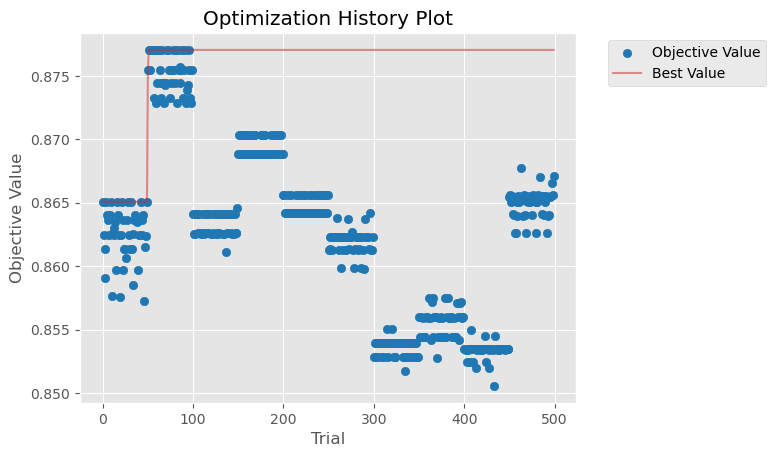

In [35]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_rf);

In [36]:
detailed_objective_rf_CV(study_rf.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,TP,25.700000,3.020302
1,TN,96.300000,2.750757
2,FP,4.200000,2.616189
3,FN,7.700000,3.056868
4,Accuracy,0.911138,0.034703
5,Precision,0.862303,0.086345
6,Sensitivity,0.769661,0.091315
7,Specificity,0.958200,0.026063
8,F1 score,0.811146,0.077441
9,F1 score (weighted),0.909225,0.036002


In [37]:
mat_met_rf_test['ave'] = mat_met_rf_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_rf_test['std'] = mat_met_rf_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_rf_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,44.000000,44.000000,48.000000,48.000000,41.000000,49.000000,52.000000,47.000000,51.000000,49.000000,47.300000,3.400980
1,TN,195.000000,191.000000,195.000000,191.000000,188.000000,190.000000,191.000000,190.000000,198.000000,197.000000,192.600000,3.373096
2,FP,4.000000,9.000000,6.000000,8.000000,12.000000,10.000000,9.000000,11.000000,4.000000,4.000000,7.700000,3.020302
3,FN,25.000000,24.000000,19.000000,21.000000,27.000000,19.000000,16.000000,20.000000,15.000000,18.000000,20.400000,3.893014
4,Accuracy,0.891791,0.876866,0.906716,0.891791,0.854478,0.891791,0.906716,0.884328,0.929104,0.917910,0.895149,0.021286
5,Precision,0.916667,0.830189,0.888889,0.857143,0.773585,0.830508,0.852459,0.810345,0.927273,0.924528,0.861159,0.052152
6,Sensitivity,0.637681,0.647059,0.716418,0.695652,0.602941,0.720588,0.764706,0.701493,0.772727,0.731343,0.699061,0.055047
7,Specificity,0.979900,0.955000,0.970100,0.959800,0.940000,0.950000,0.955000,0.945300,0.980200,0.980100,0.961540,0.015101
8,F1 score,0.752137,0.727273,0.793388,0.768000,0.677686,0.771654,0.806202,0.752000,0.842975,0.816667,0.770798,0.047553
9,F1 score (weighted),0.884792,0.871459,0.903166,0.887876,0.848088,0.889147,0.904988,0.881431,0.926822,0.914503,0.891227,0.022473


In [38]:
#change to fit into these X values 

TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)



Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []
data_rf=pd.DataFrame()

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_rf = RandomForestClassifier(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=8, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )
        optimizedCV_rf.fit(X_train,
                          y_train, 
                          
                  )
        #print(test_idx)
        y_pred_optimized_rf = optimizedCV_rf.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_rf': y_pred_optimized_rf } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
   
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_rf)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
    
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_rf))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_rf))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_rf))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_rf))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_rf, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_rf, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_rf))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_rf))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_rf))
    data_rf['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_rf['y_test' + str(i)] = data_inner['y_test']
    data_rf['y_pred_rf' + str(i)] = data_inner['y_pred_rf']
   # data_rf['correct' + str(i)] = correct_value
   # data_rf['pred' + str(i)] = y_pred_optimized_rf

mat_met_optimized_rf = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [ np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 

mat_met_optimized_rf

,Metric,Value (average),Value (std)
0,Accuracy,0.908582,0.020198
1,Precision,0.866825,0.042572
2,Sensitivity,0.749770,0.074188
3,Specificity,0.961406,0.013415
4,F1 score,0.801971,0.051255
5,F1 score (weighted),0.905962,0.022054
6,F1 score (macro),0.871239,0.031761
7,Balanced Accuracy,0.855586,0.037081
8,MCC,0.747917,0.059407
9,NPV,0.920848,0.021389


In [39]:
#cross valide using this optimized RF 
rf_baseline_CVscore = cross_val_score(rf_clf, X, Y, cv=10, scoring="f1_macro")
#rf_opt_testSet_score = cross_val_score(optimized_rf, X, Y, cv=10, scoring="f1_macro")
rf_opt_CVscore = cross_val_score(optimizedCV_rf, X, Y, cv=10, scoring="f1_macro")
print("RF baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_baseline_CVscore), np.std(rf_baseline_CVscore, ddof=1)))
#print("RF optimized model (tested on Y_te) f1_score %0.4f with a standard deviation of %0.4f" % (rf_opt_testSet_score.mean(), rf_opt_testSet_score.std()))
print("RF optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_opt_CVscore), np.std(rf_opt_CVscore, ddof=1)))

RF baseline model f1_score 0.8682 with a standard deviation of 0.0257
RF optimized model f1_score 0.8700 with a standard deviation of 0.0257


In [40]:
import joblib
joblib.dump(rf_clf, "OUTPUT/rf_clf.joblib")
#joblib.dump(optimized_rf, "OUTPUT/optimized_rf.joblib") # fitted to whole training set with last random_state selected
joblib.dump(optimizedCV_rf, "OUTPUT/optimizedCV_rf_clf.joblib")

['OUTPUT/optimizedCV_rf_clf.joblib']

## LGBMclassifier

In [41]:
%%time

TP=np.empty(10)
TN = np.empty(10)
FP= np.empty(10)
FN= np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W=np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        
        lgbm_clf = lgbm.LGBMClassifier(
        objective="binary",
        random_state=1121218,
        #n_estimators=150,
        boosting_type ="gbdt",  # default histogram binning of LGBM,
        n_jobs=8,
        #min_child_samples = 15,
        subsample=0.8, # also called bagging_fraction
        subsample_freq=10,
     
           )


        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_clf.fit(
                    X_train,
                    y_train,
                    eval_set=eval_set,
                    eval_metric="logloss",
                    #early_stopping_rounds=150,
                    verbose=False,
                    )

        y_pred = lgbm_clf.predict(X_test) 
        
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


mat_met_lgbm = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
print(mat_met_lgbm)

                 Metric  Value (average)  Value (std)
0                    TP        25.200000     2.780887
1                    TN        95.300000     2.830391
2                    FP         5.200000     2.859681
3                    FN         8.200000     2.616189
4              Accuracy         0.899944     0.030046
5             Precision         0.833770     0.076743
6           Sensitivity         0.754237     0.079918
7           Specificity         0.948290     0.028335
8              F1 score         0.789182     0.065060
9   F1 score (weighted)         0.898149     0.030496
10     F1 score (macro)         0.861735     0.042038
11    Balanced Accuracy         0.851262     0.043481
12                  MCC         0.727583     0.081736
13                  NPV         0.921210     0.022855
14              ROC_AUC         0.851262     0.043481
CPU times: user 9.16 s, sys: 72.1 ms, total: 9.23 s
Wall time: 1.19 s


In [42]:
import optuna  

def objective_lgbm_CV(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggestegorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggestegorical("bagging_freq", [1]),
        }
  
    
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMClassifier(objective="binary", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=8,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
        cv_scores[idx] = f1_score(y_test, y_pred, average="macro")
       
        
    return np.mean(cv_scores)

In [43]:
#this is basically inner set parameters
def detailed_objective_lgbm_cv(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggestegorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggestegorical("bagging_freq", [1]),
        
    }
    
    
  
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M =np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMClassifier(objective="binary", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=8,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        
        y_pred = lgbm_model.predict(X_test)
        
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    print(mat_met)

In [44]:
#Execute optuna and set hyperparameters
study_lgbm = optuna.create_study(direction='maximize', study_name="LGBMClassifier")
func_lgbm_0 = lambda trial: objective_lgbm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_lgbm.optimize(func_lgbm_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:35:47,807] A new study created in memory with name: LGBMClassifier
[I 2023-12-05 12:35:48,475] Trial 0 finished with value: 0.8580370824614223 and parameters: {'n_estimators': 849, 'learning_rate': 0.1169998110615008, 'max_depth': 6, 'max_bin': 237, 'num_leaves': 523}. Best is trial 0 with value: 0.8580370824614223.
[I 2023-12-05 12:35:49,057] Trial 1 finished with value: 0.8622076528594148 and parameters: {'n_estimators': 737, 'learning_rate': 0.16915393210796775, 'max_depth': 5, 'max_bin': 292, 'num_leaves': 217}. Best is trial 1 with value: 0.8622076528594148.
[I 2023-12-05 12:35:50,017] Trial 2 finished with value: 0.8802999198522674 and parameters: {'n_estimators': 886, 'learning_rate': 0.1190381174320308, 'max_depth': 12, 'max_bin': 270, 'num_leaves': 626}. Best is trial 2 with value: 0.8802999198522674.
[I 2023-12-05 12:35:50,773] Trial 3 finished with value: 0.8639618136570167 and parameters: {'n_estimators': 153, 'learning_rate': 0.0922692518252608, 'max_depth

	Number of trials: 50.0
	Best value (f1_score): 0.8803
	Best params:
		n_estimators: 886
		learning_rate: 0.1190381174320308
		max_depth: 12
		max_bin: 270
		num_leaves: 626


In [45]:
optimized_lgbm_0 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
                                         
    
eval_set = [(X_testSet0, Y_testSet0)]
optimized_lgbm_0.fit(X_trainSet0,
                Y_trainSet0,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_0 = optimized_lgbm_0.predict(X_testSet0)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_lgbm_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_lgbm_0)
Precision = precision_score(Y_testSet0, y_pred_lgbm_0)
Sensitivity = recall_score(Y_testSet0, y_pred_lgbm_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_lgbm_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_lgbm_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_lgbm_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_lgbm_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_lgbm_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_lgbm_0)


mat_met_lgbm_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_lgbm_test)



                 Metric        Set0
0                    TP   37.000000
1                    TN  190.000000
2                    FP    9.000000
3                    FN   32.000000
4              Accuracy    0.847015
5             Precision    0.804348
6           Sensitivity    0.536232
7           Specificity    0.954800
8              F1 score    0.643478
9   F1 score (weighted)    0.835895
10     F1 score (macro)    0.773046
11    Balanced Accuracy    0.745503
12                  MCC    0.569354
13                  NPV    0.855900
14              ROC_AUC    0.745503


In [46]:
#Execute optuna and set hyperparameters

func_lgbm_1 = lambda trial: objective_lgbm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_lgbm.optimize(func_lgbm_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:36:32,915] Trial 50 finished with value: 0.8705196085923369 and parameters: {'n_estimators': 446, 'learning_rate': 0.14330341998609344, 'max_depth': 10, 'max_bin': 300, 'num_leaves': 90}. Best is trial 2 with value: 0.8802999198522674.
[I 2023-12-05 12:36:33,683] Trial 51 finished with value: 0.8714860288910234 and parameters: {'n_estimators': 556, 'learning_rate': 0.12468152788159684, 'max_depth': 11, 'max_bin': 275, 'num_leaves': 70}. Best is trial 2 with value: 0.8802999198522674.
[I 2023-12-05 12:36:34,607] Trial 52 finished with value: 0.8781527402245966 and parameters: {'n_estimators': 567, 'learning_rate': 0.11259448450930827, 'max_depth': 12, 'max_bin': 282, 'num_leaves': 147}. Best is trial 2 with value: 0.8802999198522674.
[I 2023-12-05 12:36:35,445] Trial 53 finished with value: 0.8666380406330771 and parameters: {'n_estimators': 415, 'learning_rate': 0.13390250132605397, 'max_depth': 12, 'max_bin': 285, 'num_leaves': 147}. Best is trial 2 with value: 0.8802

	Number of trials: 100.0
	Best value (f1_score): 0.8871
	Best params:
		n_estimators: 616
		learning_rate: 0.10205639024483008
		max_depth: 12
		max_bin: 226
		num_leaves: 234


In [47]:
optimized_lgbm_1 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_lgbm_1.fit(X_trainSet1,
                Y_trainSet1,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_1 = optimized_lgbm_1.predict(X_testSet1)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_lgbm_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_lgbm_1)
Precision = precision_score(Y_testSet1, y_pred_lgbm_1)
Sensitivity = recall_score(Y_testSet1, y_pred_lgbm_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_lgbm_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_lgbm_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_lgbm_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_lgbm_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_lgbm_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_lgbm_1)


set1 = pd.DataFrame({ 'Set1':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set1'] =set1
print(mat_met_lgbm_test)


                 Metric        Set0        Set1
0                    TP   37.000000   46.000000
1                    TN  190.000000  188.000000
2                    FP    9.000000   12.000000
3                    FN   32.000000   22.000000
4              Accuracy    0.847015    0.873134
5             Precision    0.804348    0.793103
6           Sensitivity    0.536232    0.676471
7           Specificity    0.954800    0.940000
8              F1 score    0.643478    0.730159
9   F1 score (weighted)    0.835895    0.869647
10     F1 score (macro)    0.773046    0.823616
11    Balanced Accuracy    0.745503    0.808235
12                  MCC    0.569354    0.651416
13                  NPV    0.855900    0.895200
14              ROC_AUC    0.745503    0.808235


In [48]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_2 = lambda trial: objective_lgbm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_lgbm.optimize(func_lgbm_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:37:19,108] Trial 100 finished with value: 0.8669435459604063 and parameters: {'n_estimators': 333, 'learning_rate': 0.10606631261200805, 'max_depth': 9, 'max_bin': 162, 'num_leaves': 361}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:37:19,977] Trial 101 finished with value: 0.8649251951501657 and parameters: {'n_estimators': 386, 'learning_rate': 0.10076205437083206, 'max_depth': 8, 'max_bin': 162, 'num_leaves': 441}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:37:20,816] Trial 102 finished with value: 0.8620873406591354 and parameters: {'n_estimators': 239, 'learning_rate': 0.11237516935907746, 'max_depth': 9, 'max_bin': 167, 'num_leaves': 400}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:37:21,721] Trial 103 finished with value: 0.8699548134928362 and parameters: {'n_estimators': 572, 'learning_rate': 0.10149604308515113, 'max_depth': 10, 'max_bin': 178, 'num_leaves': 452}. Best is trial 63 with value:

	Number of trials: 150.0
	Best value (f1_score): 0.8871
	Best params:
		n_estimators: 616
		learning_rate: 0.10205639024483008
		max_depth: 12
		max_bin: 226
		num_leaves: 234


In [49]:
optimized_lgbm_2 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet2, Y_testSet2)]
optimized_lgbm_2.fit(X_trainSet2,
                Y_trainSet2,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_2 = optimized_lgbm_2.predict(X_testSet2)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_lgbm_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_lgbm_2)
Precision = precision_score(Y_testSet2, y_pred_lgbm_2)
Sensitivity = recall_score(Y_testSet2, y_pred_lgbm_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_lgbm_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_lgbm_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_lgbm_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_lgbm_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_lgbm_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_lgbm_2)


Set2 = pd.DataFrame({ 'Set2':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set2'] = Set2
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2
0                    TP   37.000000   46.000000   50.000000
1                    TN  190.000000  188.000000  189.000000
2                    FP    9.000000   12.000000   12.000000
3                    FN   32.000000   22.000000   17.000000
4              Accuracy    0.847015    0.873134    0.891791
5             Precision    0.804348    0.793103    0.806452
6           Sensitivity    0.536232    0.676471    0.746269
7           Specificity    0.954800    0.940000    0.940300
8              F1 score    0.643478    0.730159    0.775194
9   F1 score (weighted)    0.835895    0.869647    0.890359
10     F1 score (macro)    0.773046    0.823616    0.851970
11    Balanced Accuracy    0.745503    0.808235    0.843284
12                  MCC    0.569354    0.651416    0.705000
13                  NPV    0.855900    0.895200    0.917500
14              ROC_AUC    0.745503    0.808235    0.843284


In [50]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_3 = lambda trial: objective_lgbm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_lgbm.optimize(func_lgbm_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:38:04,822] Trial 150 finished with value: 0.861031338787417 and parameters: {'n_estimators': 580, 'learning_rate': 0.09834709409372255, 'max_depth': 10, 'max_bin': 180, 'num_leaves': 279}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:38:05,726] Trial 151 finished with value: 0.8646910857896446 and parameters: {'n_estimators': 540, 'learning_rate': 0.07199625247797863, 'max_depth': 8, 'max_bin': 175, 'num_leaves': 437}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:38:06,623] Trial 152 finished with value: 0.8638689869001936 and parameters: {'n_estimators': 598, 'learning_rate': 0.08001962243580302, 'max_depth': 8, 'max_bin': 174, 'num_leaves': 421}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:38:07,446] Trial 153 finished with value: 0.8682517619434277 and parameters: {'n_estimators': 515, 'learning_rate': 0.08516539019496223, 'max_depth': 7, 'max_bin': 265, 'num_leaves': 444}. Best is trial 63 with value: 

	Number of trials: 200.0
	Best value (f1_score): 0.8871
	Best params:
		n_estimators: 616
		learning_rate: 0.10205639024483008
		max_depth: 12
		max_bin: 226
		num_leaves: 234


In [51]:
optimized_lgbm_3 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet3, Y_testSet3)]
optimized_lgbm_3.fit(X_trainSet3,
                Y_trainSet3,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_3 = optimized_lgbm_3.predict(X_testSet3)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_lgbm_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_lgbm_3)
Precision = precision_score(Y_testSet3, y_pred_lgbm_3)
Sensitivity = recall_score(Y_testSet3, y_pred_lgbm_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_lgbm_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_lgbm_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_lgbm_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_lgbm_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_lgbm_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_lgbm_3)


Set3 = pd.DataFrame({ 'Set3':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set3'] = Set3
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   37.000000   46.000000   50.000000   47.000000
1                    TN  190.000000  188.000000  189.000000  192.000000
2                    FP    9.000000   12.000000   12.000000    7.000000
3                    FN   32.000000   22.000000   17.000000   22.000000
4              Accuracy    0.847015    0.873134    0.891791    0.891791
5             Precision    0.804348    0.793103    0.806452    0.870370
6           Sensitivity    0.536232    0.676471    0.746269    0.681159
7           Specificity    0.954800    0.940000    0.940300    0.964800
8              F1 score    0.643478    0.730159    0.775194    0.764228
9   F1 score (weighted)    0.835895    0.869647    0.890359    0.887158
10     F1 score (macro)    0.773046    0.823616    0.851970    0.847005
11    Balanced Accuracy    0.745503    0.808235    0.843284    0.822992
12                  MCC    0.569354    0.651416    0.705000    0

In [52]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_4 = lambda trial: objective_lgbm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_lgbm.optimize(func_lgbm_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:38:52,216] Trial 200 finished with value: 0.8770362458340525 and parameters: {'n_estimators': 570, 'learning_rate': 0.0958268101952349, 'max_depth': 12, 'max_bin': 163, 'num_leaves': 557}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:38:53,254] Trial 201 finished with value: 0.8835275630440302 and parameters: {'n_estimators': 562, 'learning_rate': 0.09569352843265791, 'max_depth': 12, 'max_bin': 162, 'num_leaves': 593}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:38:54,310] Trial 202 finished with value: 0.8800669006831013 and parameters: {'n_estimators': 553, 'learning_rate': 0.10033366736065366, 'max_depth': 12, 'max_bin': 153, 'num_leaves': 587}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:38:55,387] Trial 203 finished with value: 0.8748530519892412 and parameters: {'n_estimators': 540, 'learning_rate': 0.09977460404747772, 'max_depth': 12, 'max_bin': 154, 'num_leaves': 593}. Best is trial 63 with valu

	Number of trials: 250.0
	Best value (f1_score): 0.8871
	Best params:
		n_estimators: 616
		learning_rate: 0.10205639024483008
		max_depth: 12
		max_bin: 226
		num_leaves: 234


In [53]:
optimized_lgbm_4 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet4, Y_testSet4)]
optimized_lgbm_4.fit(X_trainSet4,
                Y_trainSet4,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_4 = optimized_lgbm_4.predict(X_testSet4)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_lgbm_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_lgbm_4)
Precision = precision_score(Y_testSet4, y_pred_lgbm_4)
Sensitivity = recall_score(Y_testSet4, y_pred_lgbm_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_lgbm_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_lgbm_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_lgbm_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_lgbm_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_lgbm_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_lgbm_4)


Set4 = pd.DataFrame({ 'Set4':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set4'] = Set4
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   37.000000   46.000000   50.000000   47.000000   
1                    TN  190.000000  188.000000  189.000000  192.000000   
2                    FP    9.000000   12.000000   12.000000    7.000000   
3                    FN   32.000000   22.000000   17.000000   22.000000   
4              Accuracy    0.847015    0.873134    0.891791    0.891791   
5             Precision    0.804348    0.793103    0.806452    0.870370   
6           Sensitivity    0.536232    0.676471    0.746269    0.681159   
7           Specificity    0.954800    0.940000    0.940300    0.964800   
8              F1 score    0.643478    0.730159    0.775194    0.764228   
9   F1 score (weighted)    0.835895    0.869647    0.890359    0.887158   
10     F1 score (macro)    0.773046    0.823616    0.851970    0.847005   
11    Balanced Accuracy    0.745503    0.808235    0.843284    0.822992   
12                  MCC  

In [54]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_5 = lambda trial: objective_lgbm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_lgbm.optimize(func_lgbm_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:39:47,764] Trial 250 finished with value: 0.8619068090748193 and parameters: {'n_estimators': 564, 'learning_rate': 0.14010168260872535, 'max_depth': 12, 'max_bin': 257, 'num_leaves': 123}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:39:48,600] Trial 251 finished with value: 0.8584812580235324 and parameters: {'n_estimators': 546, 'learning_rate': 0.13339942331185675, 'max_depth': 12, 'max_bin': 163, 'num_leaves': 122}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:39:49,421] Trial 252 finished with value: 0.8617634238436895 and parameters: {'n_estimators': 574, 'learning_rate': 0.13791432008692245, 'max_depth': 12, 'max_bin': 159, 'num_leaves': 142}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:39:50,278] Trial 253 finished with value: 0.8735765696317547 and parameters: {'n_estimators': 542, 'learning_rate': 0.1327407416817025, 'max_depth': 12, 'max_bin': 162, 'num_leaves': 137}. Best is trial 63 with valu

	Number of trials: 300.0
	Best value (f1_score): 0.8871
	Best params:
		n_estimators: 616
		learning_rate: 0.10205639024483008
		max_depth: 12
		max_bin: 226
		num_leaves: 234


In [55]:
optimized_lgbm_5 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet5, Y_testSet5)]
optimized_lgbm_5.fit(X_trainSet5,
                Y_trainSet5,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_5 = optimized_lgbm_5.predict(X_testSet5)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_lgbm_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_lgbm_5)
Precision = precision_score(Y_testSet5, y_pred_lgbm_5)
Sensitivity = recall_score(Y_testSet5, y_pred_lgbm_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_lgbm_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_lgbm_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_lgbm_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_lgbm_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_lgbm_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_lgbm_5)


Set5 = pd.DataFrame({ 'Set5':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set5'] = Set5
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   37.000000   46.000000   50.000000   47.000000   
1                    TN  190.000000  188.000000  189.000000  192.000000   
2                    FP    9.000000   12.000000   12.000000    7.000000   
3                    FN   32.000000   22.000000   17.000000   22.000000   
4              Accuracy    0.847015    0.873134    0.891791    0.891791   
5             Precision    0.804348    0.793103    0.806452    0.870370   
6           Sensitivity    0.536232    0.676471    0.746269    0.681159   
7           Specificity    0.954800    0.940000    0.940300    0.964800   
8              F1 score    0.643478    0.730159    0.775194    0.764228   
9   F1 score (weighted)    0.835895    0.869647    0.890359    0.887158   
10     F1 score (macro)    0.773046    0.823616    0.851970    0.847005   
11    Balanced Accuracy    0.745503    0.808235    0.843284    0.822992   
12                  MCC  

In [56]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_6 = lambda trial: objective_lgbm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_lgbm.optimize(func_lgbm_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.6f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:40:35,690] Trial 300 finished with value: 0.8646883795403782 and parameters: {'n_estimators': 510, 'learning_rate': 0.09370375531616829, 'max_depth': 7, 'max_bin': 164, 'num_leaves': 383}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:40:37,043] Trial 301 finished with value: 0.8683706355146456 and parameters: {'n_estimators': 568, 'learning_rate': 0.053775880738485035, 'max_depth': 12, 'max_bin': 168, 'num_leaves': 144}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:40:37,983] Trial 302 finished with value: 0.8625658305218747 and parameters: {'n_estimators': 551, 'learning_rate': 0.10847419393032855, 'max_depth': 12, 'max_bin': 159, 'num_leaves': 437}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:40:38,822] Trial 303 finished with value: 0.8631403369660975 and parameters: {'n_estimators': 613, 'learning_rate': 0.13885314548210093, 'max_depth': 11, 'max_bin': 153, 'num_leaves': 350}. Best is trial 63 with val

	Number of trials: 350.0
	Best value (f1_score): 0.887101
	Best params:
		n_estimators: 616
		learning_rate: 0.10205639024483008
		max_depth: 12
		max_bin: 226
		num_leaves: 234


In [57]:
optimized_lgbm_6 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet6, Y_testSet6)]
optimized_lgbm_6.fit(X_trainSet6,
                Y_trainSet6,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_6 = optimized_lgbm_6.predict(X_testSet6)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_lgbm_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_lgbm_6)
Precision = precision_score(Y_testSet6, y_pred_lgbm_6)
Sensitivity = recall_score(Y_testSet6, y_pred_lgbm_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_lgbm_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_lgbm_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_lgbm_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_lgbm_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_lgbm_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_lgbm_6)


Set6 = pd.DataFrame({ 'Set6':[ np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set6'] = Set6
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   37.000000   46.000000   50.000000   47.000000   
1                    TN  190.000000  188.000000  189.000000  192.000000   
2                    FP    9.000000   12.000000   12.000000    7.000000   
3                    FN   32.000000   22.000000   17.000000   22.000000   
4              Accuracy    0.847015    0.873134    0.891791    0.891791   
5             Precision    0.804348    0.793103    0.806452    0.870370   
6           Sensitivity    0.536232    0.676471    0.746269    0.681159   
7           Specificity    0.954800    0.940000    0.940300    0.964800   
8              F1 score    0.643478    0.730159    0.775194    0.764228   
9   F1 score (weighted)    0.835895    0.869647    0.890359    0.887158   
10     F1 score (macro)    0.773046    0.823616    0.851970    0.847005   
11    Balanced Accuracy    0.745503    0.808235    0.843284    0.822992   
12                  MCC  

In [58]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_7 = lambda trial: objective_lgbm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_lgbm.optimize(func_lgbm_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.7f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:41:29,793] Trial 350 finished with value: 0.8612800552101886 and parameters: {'n_estimators': 566, 'learning_rate': 0.13002858228637307, 'max_depth': 12, 'max_bin': 171, 'num_leaves': 392}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:41:30,695] Trial 351 finished with value: 0.8520358179895744 and parameters: {'n_estimators': 522, 'learning_rate': 0.13802751946230438, 'max_depth': 12, 'max_bin': 159, 'num_leaves': 592}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:41:32,206] Trial 352 finished with value: 0.8468733485764772 and parameters: {'n_estimators': 581, 'learning_rate': 0.03158194707263769, 'max_depth': 12, 'max_bin': 165, 'num_leaves': 122}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:41:34,147] Trial 353 finished with value: 0.8403825803368701 and parameters: {'n_estimators': 546, 'learning_rate': 0.016888842291581812, 'max_depth': 9, 'max_bin': 239, 'num_leaves': 141}. Best is trial 63 with val

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[I 2023-12-05 12:41:34,810] Trial 354 finished with value: 0.8325464760096853 and parameters: {'n_estimators': 640, 'learning_rate': 0.14854027904694425, 'max_depth': 8, 'max_bin': 285, 'num_leaves': 31}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:41:35,803] Trial 355 finished with value: 0.8520728469929276 and parameters: {'n_estimators': 436, 'learning_rate': 0.09190255490886208, 'max_depth': 12, 'max_bin': 184, 'num_leaves': 560}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:41:39,978] Trial 356 finished with value: 0.8462652080151598 and parameters: {'n_estimators': 615, 'learning_rate': 0.005797313022820064, 'max_depth': 12, 'max_bin': 153, 'num_leaves': 432}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:41:40,845] Trial 357 finished with value: 0.850709242544592 and parameters: {'n_estimators': 665, 'learning_rate': 0.10054245676681425, 'max_depth': 9, 'max_bin': 163, 'num_leaves': 418}. Best is trial 63 with value:

	Number of trials: 400.0
	Best value (f1_score): 0.8871010
	Best params:
		n_estimators: 616
		learning_rate: 0.10205639024483008
		max_depth: 12
		max_bin: 226
		num_leaves: 234


In [59]:
optimized_lgbm_7 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet7, Y_testSet7)]
optimized_lgbm_7.fit(X_trainSet7,
                Y_trainSet7,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_7 = optimized_lgbm_7.predict(X_testSet7)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_lgbm_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_lgbm_7)
Precision = precision_score(Y_testSet7, y_pred_lgbm_7)
Sensitivity = recall_score(Y_testSet7, y_pred_lgbm_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_lgbm_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_lgbm_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_lgbm_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_lgbm_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_lgbm_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_lgbm_7)


Set7 = pd.DataFrame({ 'Set7':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set7'] = Set7
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   37.000000   46.000000   50.000000   47.000000   
1                    TN  190.000000  188.000000  189.000000  192.000000   
2                    FP    9.000000   12.000000   12.000000    7.000000   
3                    FN   32.000000   22.000000   17.000000   22.000000   
4              Accuracy    0.847015    0.873134    0.891791    0.891791   
5             Precision    0.804348    0.793103    0.806452    0.870370   
6           Sensitivity    0.536232    0.676471    0.746269    0.681159   
7           Specificity    0.954800    0.940000    0.940300    0.964800   
8              F1 score    0.643478    0.730159    0.775194    0.764228   
9   F1 score (weighted)    0.835895    0.869647    0.890359    0.887158   
10     F1 score (macro)    0.773046    0.823616    0.851970    0.847005   
11    Balanced Accuracy    0.745503    0.808235    0.843284    0.822992   
12                  MCC  

In [60]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_8 = lambda trial: objective_lgbm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_lgbm.optimize(func_lgbm_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.8f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:42:22,048] Trial 400 finished with value: 0.8605499238188667 and parameters: {'n_estimators': 268, 'learning_rate': 0.079465684903548, 'max_depth': 8, 'max_bin': 178, 'num_leaves': 388}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:42:23,703] Trial 401 finished with value: 0.8639858014856122 and parameters: {'n_estimators': 568, 'learning_rate': 0.031901623038172025, 'max_depth': 12, 'max_bin': 280, 'num_leaves': 509}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:42:25,888] Trial 402 finished with value: 0.8560242234809096 and parameters: {'n_estimators': 466, 'learning_rate': 0.01863945677287253, 'max_depth': 12, 'max_bin': 154, 'num_leaves': 145}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:42:26,915] Trial 403 finished with value: 0.860667576048062 and parameters: {'n_estimators': 542, 'learning_rate': 0.08989647796539488, 'max_depth': 12, 'max_bin': 157, 'num_leaves': 653}. Best is trial 63 with value:

	Number of trials: 450.0
	Best value (f1_score): 0.88710098
	Best params:
		n_estimators: 616
		learning_rate: 0.10205639024483008
		max_depth: 12
		max_bin: 226
		num_leaves: 234


In [61]:
optimized_lgbm_8 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet8, Y_testSet8)]
optimized_lgbm_8.fit(X_trainSet8,
                Y_trainSet8,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_8 = optimized_lgbm_8.predict(X_testSet8)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_lgbm_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_lgbm_8)
Precision = precision_score(Y_testSet8, y_pred_lgbm_8)
Sensitivity = recall_score(Y_testSet8, y_pred_lgbm_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_lgbm_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_lgbm_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_lgbm_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_lgbm_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_lgbm_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_lgbm_8)


Set8 = pd.DataFrame({ 'Set8':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set8'] = Set8
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   37.000000   46.000000   50.000000   47.000000   
1                    TN  190.000000  188.000000  189.000000  192.000000   
2                    FP    9.000000   12.000000   12.000000    7.000000   
3                    FN   32.000000   22.000000   17.000000   22.000000   
4              Accuracy    0.847015    0.873134    0.891791    0.891791   
5             Precision    0.804348    0.793103    0.806452    0.870370   
6           Sensitivity    0.536232    0.676471    0.746269    0.681159   
7           Specificity    0.954800    0.940000    0.940300    0.964800   
8              F1 score    0.643478    0.730159    0.775194    0.764228   
9   F1 score (weighted)    0.835895    0.869647    0.890359    0.887158   
10     F1 score (macro)    0.773046    0.823616    0.851970    0.847005   
11    Balanced Accuracy    0.745503    0.808235    0.843284    0.822992   
12                  MCC  

In [62]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="LGBMClassifier_1")
func_lgbm_9 = lambda trial: objective_lgbm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_lgbm.optimize(func_lgbm_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (f1_score): {study_lgbm.best_value:.9f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:43:18,050] Trial 450 finished with value: 0.8592780921012432 and parameters: {'n_estimators': 495, 'learning_rate': 0.08247764348081905, 'max_depth': 12, 'max_bin': 164, 'num_leaves': 110}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:43:19,214] Trial 451 finished with value: 0.8546105980121055 and parameters: {'n_estimators': 551, 'learning_rate': 0.0514750104743098, 'max_depth': 7, 'max_bin': 155, 'num_leaves': 242}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:43:20,140] Trial 452 finished with value: 0.8523337269196055 and parameters: {'n_estimators': 530, 'learning_rate': 0.11461920338932913, 'max_depth': 11, 'max_bin': 150, 'num_leaves': 560}. Best is trial 63 with value: 0.8871009773800717.
[I 2023-12-05 12:43:21,040] Trial 453 finished with value: 0.8485383850347918 and parameters: {'n_estimators': 584, 'learning_rate': 0.09986613553718346, 'max_depth': 10, 'max_bin': 162, 'num_leaves': 434}. Best is trial 63 with value

	Number of trials: 500.0
	Best value (f1_score): 0.887100977
	Best params:
		n_estimators: 616
		learning_rate: 0.10205639024483008
		max_depth: 12
		max_bin: 226
		num_leaves: 234


In [63]:
optimized_lgbm_9 = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet9, Y_testSet9)]
optimized_lgbm_9.fit(X_trainSet9,
                Y_trainSet9,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_9 = optimized_lgbm_9.predict(X_testSet9)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_lgbm_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_lgbm_9)
Precision = precision_score(Y_testSet9, y_pred_lgbm_9)
Sensitivity = recall_score(Y_testSet9, y_pred_lgbm_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_lgbm_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_lgbm_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_lgbm_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_lgbm_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_lgbm_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_lgbm_9)


Set9 = pd.DataFrame({ 'Set9':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set9'] = Set9
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   37.000000   46.000000   50.000000   47.000000   
1                    TN  190.000000  188.000000  189.000000  192.000000   
2                    FP    9.000000   12.000000   12.000000    7.000000   
3                    FN   32.000000   22.000000   17.000000   22.000000   
4              Accuracy    0.847015    0.873134    0.891791    0.891791   
5             Precision    0.804348    0.793103    0.806452    0.870370   
6           Sensitivity    0.536232    0.676471    0.746269    0.681159   
7           Specificity    0.954800    0.940000    0.940300    0.964800   
8              F1 score    0.643478    0.730159    0.775194    0.764228   
9   F1 score (weighted)    0.835895    0.869647    0.890359    0.887158   
10     F1 score (macro)    0.773046    0.823616    0.851970    0.847005   
11    Balanced Accuracy    0.745503    0.808235    0.843284    0.822992   
12                  MCC  

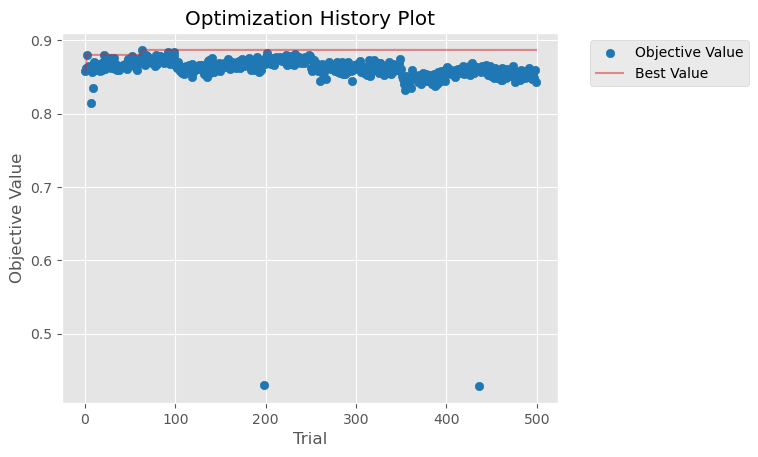

In [64]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_lgbm);

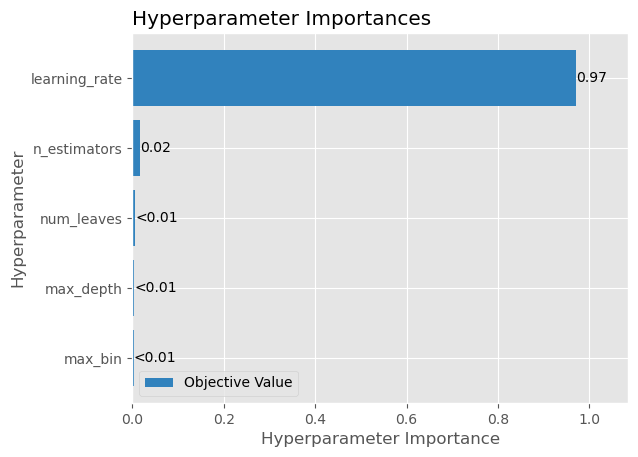

In [65]:
from optuna.visualization.matplotlib import plot_param_importances
plot_param_importances(study_lgbm);

In [66]:
detailed_objective_lgbm_cv(study_lgbm.best_trial, X, Y, Y_class)

                 Metric  Value (average)  Value (std)
0                    TP        25.600000     3.062316
1                    TN        95.900000     2.766867
2                    FP         4.600000     2.756810
3                    FN         7.800000     2.898275
4              Accuracy         0.907401     0.033759
5             Precision         0.851115     0.083880
6           Sensitivity         0.766185     0.088308
7           Specificity         0.954250     0.027337
8              F1 score         0.803969     0.073981
9   F1 score (weighted)         0.905610     0.034517
10     F1 score (macro)         0.871635     0.047783
11    Balanced Accuracy         0.860216     0.049779
12                  MCC         0.747269     0.094640
13                  NPV         0.925250     0.026136
14              ROC_AUC         0.860216     0.049779


In [67]:
mat_met_lgbm_test['ave'] = mat_met_lgbm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_lgbm_test['std'] = mat_met_lgbm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_lgbm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,37.000000,46.000000,50.000000,47.000000,43.000000,51.000000,51.000000,50.000000,47.000000,44.000000,46.600000,4.402020
1,TN,190.000000,188.000000,189.000000,192.000000,190.000000,192.000000,192.000000,192.000000,197.000000,197.000000,191.900000,3.034981
2,FP,9.000000,12.000000,12.000000,7.000000,10.000000,8.000000,8.000000,9.000000,5.000000,4.000000,8.400000,2.633122
3,FN,32.000000,22.000000,17.000000,22.000000,25.000000,17.000000,17.000000,17.000000,19.000000,23.000000,21.100000,4.840799
4,Accuracy,0.847015,0.873134,0.891791,0.891791,0.869403,0.906716,0.906716,0.902985,0.910448,0.899254,0.889925,0.020532
5,Precision,0.804348,0.793103,0.806452,0.870370,0.811321,0.864407,0.864407,0.847458,0.903846,0.916667,0.848238,0.043286
6,Sensitivity,0.536232,0.676471,0.746269,0.681159,0.632353,0.750000,0.750000,0.746269,0.712121,0.656716,0.688759,0.068591
7,Specificity,0.954800,0.940000,0.940300,0.964800,0.950000,0.960000,0.960000,0.955200,0.975200,0.980100,0.958040,0.013157
8,F1 score,0.643478,0.730159,0.775194,0.764228,0.710744,0.803150,0.803150,0.793651,0.796610,0.765217,0.758558,0.050931
9,F1 score (weighted),0.835895,0.869647,0.890359,0.887158,0.863668,0.904437,0.904437,0.900852,0.906635,0.893205,0.885629,0.022788


In [68]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)


Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_lgbm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_lgbm = lgbm.LGBMClassifier(objective="binary", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_lgbm.fit(X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="binary_logloss",     
                early_stopping_rounds=50,
                verbose = False,
                )
                          
                  
        #print(test_idx)
        y_pred_optimized_lgbm = optimizedCV_lgbm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_lgbm': y_pred_optimized_lgbm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_lgbm)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
       
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_lgbm))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_lgbm))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_lgbm))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_lgbm))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_lgbm, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_lgbm, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_lgbm))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_lgbm))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_lgbm))
        
    data_lgbm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_lgbm['y_test' + str(i)] = data_inner['y_test']
    data_lgbm['y_pred_lgbm' + str(i)] = data_inner['y_pred_lgbm']
   # data_lgbm['correct' + str(i)] = correct_value
   # data_lgbm['pred' + str(i)] = y_pred_optimized_lgbm

mat_met_optimized_lgbm = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [ np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


mat_met_optimized_lgbm

,Metric,Value (average),Value (std)
0,Accuracy,0.906951,0.024910
1,Precision,0.861611,0.056381
2,Sensitivity,0.749292,0.084015
3,Specificity,0.959422,0.017786
4,F1 score,0.798892,0.060655
5,F1 score (weighted),0.904348,0.026711
6,F1 score (macro),0.869142,0.038001
7,Balanced Accuracy,0.854355,0.043024
8,MCC,0.743905,0.072410
9,NPV,0.920636,0.024474


In [69]:
#cross valide using this optimized LightGBM 
fit_params={'early_stopping_rounds': 50, 
        'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
            'verbose':False,
           }
#cross valide using this optimized LightGBM 
lgbm_baseline_CVscore = cross_val_score(lgbm_clf, X, Y, cv=10, scoring="f1_macro")
#f1_cv_lgbm_opt_testSet = cross_val_score(optimized_lgbm, X, Y, cv=10, scoring="f1_macro")
f1_cv_lgbm_opt = cross_val_score(optimizedCV_lgbm, X, Y, cv=10, scoring="f1_macro", fit_params=fit_params)
print("LightGBM baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(lgbm_baseline_CVscore), np.std(lgbm_baseline_CVscore, ddof=1)))
#print("LightGBM optimized model (tested on Y_te)f1_score %0.4f with a standard deviation of %0.4f" % (f1_cv_lgbm_opt_testSet.mean(), f1_cv_lgbm_opt_testSet.std()))
print("LightGBM optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(f1_cv_lgbm_opt), np.std(f1_cv_lgbm_opt, ddof=1)))

LightGBM baseline model f1_score 0.8687 with a standard deviation of 0.0500
LightGBM optimized model f1_score 0.8783 with a standard deviation of 0.0424


In [70]:
joblib.dump(lgbm_clf, "OUTPUT/lgbm_clf.joblib")
#joblib.dump(optimized_lgbm, "OUTPUT/optimized_lgbm.joblib")
joblib.dump(optimizedCV_lgbm, "OUTPUT/optimizedCV_lgbm_clf.joblib") 
#loaded_rf = joblib.load("OUTPUT/optimized_rf.joblib")

['OUTPUT/optimizedCV_lgbm_clf.joblib']

## XGBoost

In [71]:
%%time


TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)


for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=1121218,
    #n_estimators=10000,  
    tree_method="hist",  # enable histogram binning in XGB
    subsample=0.8, 
    n_jobs=8,
    )
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    xgb_clf.fit(X_train,
                y_train,
    
    eval_set=eval_set,
    eval_metric="logloss",
    early_stopping_rounds=50,
    verbose=False,  # Disable logs
               )

    y_pred = xgb_clf.predict(X_test) 
    
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test, y_pred)
    Precision[idx] = precision_score(y_test, y_pred)
    Sensitivity[idx] = recall_score(y_test, y_pred)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test, y_pred)
    f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
    f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
    MCC[idx] = matthews_corrcoef(y_test, y_pred)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    TP        25.100000     3.446415
1                    TN        96.200000     2.936362
2                    FP         4.300000     2.750757
3                    FN         8.300000     3.301515
4              Accuracy         0.905914     0.034109
5             Precision         0.857812     0.084222
6           Sensitivity         0.751212     0.100444
7           Specificity         0.957190     0.027547
8              F1 score         0.797588     0.078173
9   F1 score (weighted)         0.903455     0.035588
10     F1 score (macro)         0.868084     0.049772
11    Balanced Accuracy         0.854199     0.053685
12                  MCC         0.742068     0.097538
13                  NPV         0.921270     0.029074
14              ROC_AUC         0.854199     0.053685
CPU times: user 7.46 s, sys: 72.2 ms, total: 7.53 s
Wall time: 991 ms


In [72]:
def objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    cv_scores=np.empty(10)
    #y_comb=pd.DataFrame()
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=8, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="logloss",    
            early_stopping_rounds=50,
            verbose=False)
    
        y_pred = xgb_model.predict(X_test)
        cv_scores[idx] = f1_score(y_test, y_pred, average="macro")
            
    return np.mean(cv_scores)

In [73]:
def detailed_objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=8, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="logloss",    
            early_stopping_rounds=50,
            verbose=False)
        
        y_pred = xgb_model.predict(X_test)
        
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test, y_pred)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)

    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)   

In [74]:
#Execute optuna and set hyperparameters
study_xgb = optuna.create_study(direction='maximize', study_name="XGBClassifier")
func_xgb_0 = lambda trial: objective_xgb_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_xgb.optimize(func_xgb_0, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:44:28,907] A new study created in memory with name: XGBClassifier
[I 2023-12-05 12:44:32,955] Trial 0 finished with value: 0.8648618121847859 and parameters: {'n_estimators': 802, 'eta': 0.055813323933700594, 'max_depth': 10, 'alpha': 0.33330000000000004, 'lambda': 16.33524922650445, 'max_bin': 382}. Best is trial 0 with value: 0.8648618121847859.
[I 2023-12-05 12:44:35,786] Trial 1 finished with value: 0.8656242755428967 and parameters: {'n_estimators': 232, 'eta': 0.07639076095766455, 'max_depth': 12, 'alpha': 0.5601, 'lambda': 27.515875242572324, 'max_bin': 458}. Best is trial 1 with value: 0.8656242755428967.
[I 2023-12-05 12:44:40,920] Trial 2 finished with value: 0.8500999292577301 and parameters: {'n_estimators': 602, 'eta': 0.02533322420375487, 'max_depth': 5, 'alpha': 0.806, 'lambda': 8.917018537263571, 'max_bin': 346}. Best is trial 1 with value: 0.8656242755428967.
[I 2023-12-05 12:44:45,049] Trial 3 finished with value: 0.8640380830052251 and parameters: {'

	Number of trials: 50.0
	Best value (f1_score): 0.8775
	Best params:
		n_estimators: 638
		eta: 0.08050651458994573
		max_depth: 10
		alpha: 0.6357
		lambda: 4.145013106178915
		max_bin: 322


In [75]:
#Create an instance with tuned hyperparameters

optimized_xgb_0 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    #learn
eval_set = [(X_testSet0, Y_testSet0)]

optimized_xgb_0.fit(X_trainSet0,Y_trainSet0, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

   
y_pred_xgb_0 = optimized_xgb_0.predict(X_testSet0)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_xgb_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_xgb_0)
Precision = precision_score(Y_testSet0, y_pred_xgb_0)
Sensitivity = recall_score(Y_testSet0, y_pred_xgb_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_xgb_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_xgb_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_xgb_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_xgb_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_xgb_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_xgb_0)
    

mat_met_xgb_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_xgb_test)


                 Metric        Set0
0                    TP   43.000000
1                    TN  193.000000
2                    FP    6.000000
3                    FN   26.000000
4              Accuracy    0.880597
5             Precision    0.877551
6           Sensitivity    0.623188
7           Specificity    0.969800
8              F1 score    0.728814
9   F1 score (weighted)    0.873335
10     F1 score (macro)    0.826129
11    Balanced Accuracy    0.796519
12                  MCC    0.670831
13                  NPV    0.881300
14              ROC_AUC    0.796519


In [76]:
#Execute optuna and set hyperparameters

func_xgb_1 = lambda trial: objective_xgb_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_xgb.optimize(func_xgb_1, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:46:56,179] Trial 50 finished with value: 0.8696238891263374 and parameters: {'n_estimators': 808, 'eta': 0.09003531366049294, 'max_depth': 6, 'alpha': 0.3286, 'lambda': 4.393300086720213, 'max_bin': 267}. Best is trial 46 with value: 0.8775134292586342.
[I 2023-12-05 12:46:58,510] Trial 51 finished with value: 0.8735050091805328 and parameters: {'n_estimators': 278, 'eta': 0.09669330451781431, 'max_depth': 9, 'alpha': 0.6604, 'lambda': 5.962653014813037, 'max_bin': 309}. Best is trial 46 with value: 0.8775134292586342.
[I 2023-12-05 12:47:00,693] Trial 52 finished with value: 0.8807837725009504 and parameters: {'n_estimators': 377, 'eta': 0.0898441435613207, 'max_depth': 10, 'alpha': 0.7275, 'lambda': 2.587621833048722, 'max_bin': 301}. Best is trial 52 with value: 0.8807837725009504.
[I 2023-12-05 12:47:02,810] Trial 53 finished with value: 0.8814914375544587 and parameters: {'n_estimators': 350, 'eta': 0.09993743545046163, 'max_depth': 10, 'alpha': 0.9534, 'lambda': 

	Number of trials: 100.0
	Best value (f1_score): 0.8849
	Best params:
		n_estimators: 310
		eta: 0.08977155105733017
		max_depth: 9
		alpha: 0.8714000000000001
		lambda: 3.3899853772465174
		max_bin: 366


In [77]:
optimized_xgb_1 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_xgb_1.fit(X_trainSet1,Y_trainSet1, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_1 = optimized_xgb_1.predict(X_testSet1)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_xgb_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_xgb_1)
Precision = precision_score(Y_testSet1, y_pred_xgb_1)
Sensitivity = recall_score(Y_testSet1, y_pred_xgb_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_xgb_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_xgb_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_xgb_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_xgb_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_xgb_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_xgb_1)


set1 = pd.DataFrame({ 'Set1':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set1'] =set1
print(mat_met_xgb_test)


                 Metric        Set0        Set1
0                    TP   43.000000   48.000000
1                    TN  193.000000  189.000000
2                    FP    6.000000   11.000000
3                    FN   26.000000   20.000000
4              Accuracy    0.880597    0.884328
5             Precision    0.877551    0.813559
6           Sensitivity    0.623188    0.705882
7           Specificity    0.969800    0.945000
8              F1 score    0.728814    0.755906
9   F1 score (weighted)    0.873335    0.881502
10     F1 score (macro)    0.826129    0.840055
11    Balanced Accuracy    0.796519    0.825441
12                  MCC    0.670831    0.683554
13                  NPV    0.881300    0.904300
14              ROC_AUC    0.796519    0.825441


In [78]:
#Execute optuna and set hyperparameters
func_xgb_2 = lambda trial: objective_xgb_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_xgb.optimize(func_xgb_2, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:48:43,303] Trial 100 finished with value: 0.8708402374891877 and parameters: {'n_estimators': 312, 'eta': 0.08762674398415206, 'max_depth': 9, 'alpha': 0.8541000000000001, 'lambda': 5.117903470250692, 'max_bin': 360}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:48:45,050] Trial 101 finished with value: 0.8602040406171231 and parameters: {'n_estimators': 295, 'eta': 0.09518543479241434, 'max_depth': 9, 'alpha': 0.9186000000000001, 'lambda': 1.0183336310672595, 'max_bin': 368}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:48:47,127] Trial 102 finished with value: 0.8732466924885809 and parameters: {'n_estimators': 352, 'eta': 0.08971212706033141, 'max_depth': 10, 'alpha': 0.9539000000000001, 'lambda': 3.352262838517836, 'max_bin': 349}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:48:49,070] Trial 103 finished with value: 0.868108479910698 and parameters: {'n_estimators': 254, 'eta': 0.0921365216426475, 'max

	Number of trials: 150.0
	Best value (f1_score): 0.8849
	Best params:
		n_estimators: 310
		eta: 0.08977155105733017
		max_depth: 9
		alpha: 0.8714000000000001
		lambda: 3.3899853772465174
		max_bin: 366


In [79]:
optimized_xgb_2 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet2, Y_testSet2)]
optimized_xgb_2.fit(X_trainSet2,Y_trainSet2, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_2 = optimized_xgb_2.predict(X_testSet2)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_xgb_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_xgb_2)
Precision = precision_score(Y_testSet2, y_pred_xgb_2)
Sensitivity = recall_score(Y_testSet2, y_pred_xgb_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_xgb_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_xgb_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_xgb_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_xgb_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_xgb_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_xgb_2)


Set2 = pd.DataFrame({ 'Set2':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set2'] =Set2
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2
0                    TP   43.000000   48.000000   50.000000
1                    TN  193.000000  189.000000  190.000000
2                    FP    6.000000   11.000000   11.000000
3                    FN   26.000000   20.000000   17.000000
4              Accuracy    0.880597    0.884328    0.895522
5             Precision    0.877551    0.813559    0.819672
6           Sensitivity    0.623188    0.705882    0.746269
7           Specificity    0.969800    0.945000    0.945300
8              F1 score    0.728814    0.755906    0.781250
9   F1 score (weighted)    0.873335    0.881502    0.893842
10     F1 score (macro)    0.826129    0.840055    0.856311
11    Balanced Accuracy    0.796519    0.825441    0.845771
12                  MCC    0.670831    0.683554    0.714174
13                  NPV    0.881300    0.904300    0.917900
14              ROC_AUC    0.796519    0.825441    0.845771


In [80]:
#Execute optuna and set hyperparameters
func_xgb_3 = lambda trial: objective_xgb_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_xgb.optimize(func_xgb_3, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:50:28,283] Trial 150 finished with value: 0.872948344240881 and parameters: {'n_estimators': 390, 'eta': 0.08514780734556135, 'max_depth': 9, 'alpha': 0.6734, 'lambda': 6.539082104824078, 'max_bin': 364}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:50:30,076] Trial 151 finished with value: 0.864074778355965 and parameters: {'n_estimators': 172, 'eta': 0.09813790835597427, 'max_depth': 9, 'alpha': 0.7932, 'lambda': 3.31245166910102, 'max_bin': 357}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:50:31,330] Trial 152 finished with value: 0.8591861006399185 and parameters: {'n_estimators': 99, 'eta': 0.0967052027709819, 'max_depth': 9, 'alpha': 0.8479, 'lambda': 7.460190037339687, 'max_bin': 340}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:50:33,272] Trial 153 finished with value: 0.8619485318231117 and parameters: {'n_estimators': 189, 'eta': 0.09415383408592695, 'max_depth': 9, 'alpha': 0.7748, 'lambda': 8.

	Number of trials: 200.0
	Best value (f1_score): 0.8849
	Best params:
		n_estimators: 310
		eta: 0.08977155105733017
		max_depth: 9
		alpha: 0.8714000000000001
		lambda: 3.3899853772465174
		max_bin: 366


In [81]:
optimized_xgb_3 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet3, Y_testSet3)]
optimized_xgb_3.fit(X_trainSet3,Y_trainSet3, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_3 = optimized_xgb_3.predict(X_testSet3)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_xgb_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_xgb_3)
Precision = precision_score(Y_testSet3, y_pred_xgb_3)
Sensitivity = recall_score(Y_testSet3, y_pred_xgb_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_xgb_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_xgb_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_xgb_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_xgb_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_xgb_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_xgb_3)


Set3 = pd.DataFrame({ 'Set3':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set3'] =Set3
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   43.000000   48.000000   50.000000   47.000000
1                    TN  193.000000  189.000000  190.000000  191.000000
2                    FP    6.000000   11.000000   11.000000    8.000000
3                    FN   26.000000   20.000000   17.000000   22.000000
4              Accuracy    0.880597    0.884328    0.895522    0.888060
5             Precision    0.877551    0.813559    0.819672    0.854545
6           Sensitivity    0.623188    0.705882    0.746269    0.681159
7           Specificity    0.969800    0.945000    0.945300    0.959800
8              F1 score    0.728814    0.755906    0.781250    0.758065
9   F1 score (weighted)    0.873335    0.881502    0.893842    0.883642
10     F1 score (macro)    0.826129    0.840055    0.856311    0.842624
11    Balanced Accuracy    0.796519    0.825441    0.845771    0.820479
12                  MCC    0.670831    0.683554    0.714174    0

In [82]:
#Execute optuna and set hyperparameters
func_xgb_4 = lambda trial: objective_xgb_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_xgb.optimize(func_xgb_4, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:52:05,258] Trial 200 finished with value: 0.8748211732450277 and parameters: {'n_estimators': 281, 'eta': 0.09348144721176312, 'max_depth': 8, 'alpha': 0.6809000000000001, 'lambda': 2.685309078681551, 'max_bin': 362}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:52:07,470] Trial 201 finished with value: 0.8756839415757753 and parameters: {'n_estimators': 258, 'eta': 0.09604621050469633, 'max_depth': 9, 'alpha': 0.7284, 'lambda': 3.4136755645638366, 'max_bin': 435}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:52:09,505] Trial 202 finished with value: 0.874357360103257 and parameters: {'n_estimators': 317, 'eta': 0.09805519724909188, 'max_depth': 9, 'alpha': 0.743, 'lambda': 2.2723326069103447, 'max_bin': 372}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:52:11,665] Trial 203 finished with value: 0.8701236919861106 and parameters: {'n_estimators': 277, 'eta': 0.09070601280584946, 'max_depth': 9, 'alpha': 0.7

	Number of trials: 250.0
	Best value (f1_score): 0.8849
	Best params:
		n_estimators: 310
		eta: 0.08977155105733017
		max_depth: 9
		alpha: 0.8714000000000001
		lambda: 3.3899853772465174
		max_bin: 366


In [83]:
optimized_xgb_4 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet4, Y_testSet4)]
optimized_xgb_4.fit(X_trainSet4,Y_trainSet4, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_4 = optimized_xgb_4.predict(X_testSet4)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_xgb_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_xgb_4)
Precision = precision_score(Y_testSet4, y_pred_xgb_4)
Sensitivity = recall_score(Y_testSet4, y_pred_xgb_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_xgb_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_xgb_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_xgb_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_xgb_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_xgb_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_xgb_4)


Set4 = pd.DataFrame({ 'Set4':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set4'] =Set4
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   43.000000   48.000000   50.000000   47.000000   
1                    TN  193.000000  189.000000  190.000000  191.000000   
2                    FP    6.000000   11.000000   11.000000    8.000000   
3                    FN   26.000000   20.000000   17.000000   22.000000   
4              Accuracy    0.880597    0.884328    0.895522    0.888060   
5             Precision    0.877551    0.813559    0.819672    0.854545   
6           Sensitivity    0.623188    0.705882    0.746269    0.681159   
7           Specificity    0.969800    0.945000    0.945300    0.959800   
8              F1 score    0.728814    0.755906    0.781250    0.758065   
9   F1 score (weighted)    0.873335    0.881502    0.893842    0.883642   
10     F1 score (macro)    0.826129    0.840055    0.856311    0.842624   
11    Balanced Accuracy    0.796519    0.825441    0.845771    0.820479   
12                  MCC  

In [84]:
#Execute optuna and set hyperparameters
func_xgb_5 = lambda trial: objective_xgb_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_xgb.optimize(func_xgb_5, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:54:09,975] Trial 250 finished with value: 0.873623860553846 and parameters: {'n_estimators': 304, 'eta': 0.07115865698593535, 'max_depth': 10, 'alpha': 0.6469, 'lambda': 3.4477208041827296, 'max_bin': 369}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:54:13,617] Trial 251 finished with value: 0.8563911187182048 and parameters: {'n_estimators': 323, 'eta': 0.04390416695324575, 'max_depth': 9, 'alpha': 0.7985, 'lambda': 18.36950556942433, 'max_bin': 361}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:54:15,833] Trial 252 finished with value: 0.8774091874011457 and parameters: {'n_estimators': 698, 'eta': 0.09037313282292596, 'max_depth': 10, 'alpha': 0.6188, 'lambda': 2.149643293108689, 'max_bin': 342}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:54:18,127] Trial 253 finished with value: 0.8658391655827724 and parameters: {'n_estimators': 264, 'eta': 0.09252298239163079, 'max_depth': 9, 'alpha': 0.912, 'lambd

	Number of trials: 300.0
	Best value (f1_score): 0.8849
	Best params:
		n_estimators: 310
		eta: 0.08977155105733017
		max_depth: 9
		alpha: 0.8714000000000001
		lambda: 3.3899853772465174
		max_bin: 366


In [85]:
optimized_xgb_5 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet5, Y_testSet5)]
optimized_xgb_5.fit(X_trainSet5,Y_trainSet5, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_5 = optimized_xgb_5.predict(X_testSet5)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_xgb_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_xgb_5)
Precision = precision_score(Y_testSet5, y_pred_xgb_5)
Sensitivity = recall_score(Y_testSet5, y_pred_xgb_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_xgb_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_xgb_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_xgb_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_xgb_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_xgb_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_xgb_5)


Set5 = pd.DataFrame({ 'Set5':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set5'] =Set5
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   43.000000   48.000000   50.000000   47.000000   
1                    TN  193.000000  189.000000  190.000000  191.000000   
2                    FP    6.000000   11.000000   11.000000    8.000000   
3                    FN   26.000000   20.000000   17.000000   22.000000   
4              Accuracy    0.880597    0.884328    0.895522    0.888060   
5             Precision    0.877551    0.813559    0.819672    0.854545   
6           Sensitivity    0.623188    0.705882    0.746269    0.681159   
7           Specificity    0.969800    0.945000    0.945300    0.959800   
8              F1 score    0.728814    0.755906    0.781250    0.758065   
9   F1 score (weighted)    0.873335    0.881502    0.893842    0.883642   
10     F1 score (macro)    0.826129    0.840055    0.856311    0.842624   
11    Balanced Accuracy    0.796519    0.825441    0.845771    0.820479   
12                  MCC  

In [86]:
#Execute optuna and set hyperparameters
func_xgb_6 = lambda trial: objective_xgb_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_xgb.optimize(func_xgb_6, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:56:13,621] Trial 300 finished with value: 0.8580791742053744 and parameters: {'n_estimators': 436, 'eta': 0.08096594789646977, 'max_depth': 10, 'alpha': 0.6868000000000001, 'lambda': 18.01064953769213, 'max_bin': 407}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:56:16,352] Trial 301 finished with value: 0.8652039141987519 and parameters: {'n_estimators': 278, 'eta': 0.09648292003512839, 'max_depth': 12, 'alpha': 0.6297, 'lambda': 18.767479201818503, 'max_bin': 367}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:56:18,826] Trial 302 finished with value: 0.8583106848155685 and parameters: {'n_estimators': 347, 'eta': 0.0682405646788174, 'max_depth': 9, 'alpha': 0.7348, 'lambda': 3.034655636780557, 'max_bin': 380}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:56:21,068] Trial 303 finished with value: 0.8605643417102412 and parameters: {'n_estimators': 488, 'eta': 0.07097529930666016, 'max_depth': 9, 'alpha': 0

	Number of trials: 350.0
	Best value (f1_score): 0.8849
	Best params:
		n_estimators: 310
		eta: 0.08977155105733017
		max_depth: 9
		alpha: 0.8714000000000001
		lambda: 3.3899853772465174
		max_bin: 366


In [87]:
optimized_xgb_6 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet6, Y_testSet6)]
optimized_xgb_6.fit(X_trainSet6,Y_trainSet6, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_6 = optimized_xgb_6.predict(X_testSet6)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_xgb_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_xgb_6)
Precision = precision_score(Y_testSet6, y_pred_xgb_6)
Sensitivity = recall_score(Y_testSet6, y_pred_xgb_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_xgb_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_xgb_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_xgb_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_xgb_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_xgb_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_xgb_6)


Set6 = pd.DataFrame({ 'Set6':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set6'] =Set6
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   43.000000   48.000000   50.000000   47.000000   
1                    TN  193.000000  189.000000  190.000000  191.000000   
2                    FP    6.000000   11.000000   11.000000    8.000000   
3                    FN   26.000000   20.000000   17.000000   22.000000   
4              Accuracy    0.880597    0.884328    0.895522    0.888060   
5             Precision    0.877551    0.813559    0.819672    0.854545   
6           Sensitivity    0.623188    0.705882    0.746269    0.681159   
7           Specificity    0.969800    0.945000    0.945300    0.959800   
8              F1 score    0.728814    0.755906    0.781250    0.758065   
9   F1 score (weighted)    0.873335    0.881502    0.893842    0.883642   
10     F1 score (macro)    0.826129    0.840055    0.856311    0.842624   
11    Balanced Accuracy    0.796519    0.825441    0.845771    0.820479   
12                  MCC  

In [88]:
#Execute optuna and set hyperparameters
func_xgb_7 = lambda trial: objective_xgb_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_xgb.optimize(func_xgb_7, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 12:58:08,891] Trial 350 finished with value: 0.8717316819173145 and parameters: {'n_estimators': 284, 'eta': 0.09090742110774597, 'max_depth': 9, 'alpha': 0.6321, 'lambda': 2.8460553570628915, 'max_bin': 378}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:58:10,960] Trial 351 finished with value: 0.8653089705621589 and parameters: {'n_estimators': 232, 'eta': 0.0931475214487417, 'max_depth': 9, 'alpha': 0.7045, 'lambda': 5.568775942772099, 'max_bin': 355}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:58:13,222] Trial 352 finished with value: 0.8682272892401061 and parameters: {'n_estimators': 401, 'eta': 0.06402350491231108, 'max_depth': 9, 'alpha': 0.31570000000000004, 'lambda': 2.056965126310556, 'max_bin': 363}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 12:58:17,281] Trial 353 finished with value: 0.8619732248026601 and parameters: {'n_estimators': 774, 'eta': 0.07591093076049442, 'max_depth': 9, 'alpha': 0.

	Number of trials: 400.0
	Best value (f1_score): 0.8849
	Best params:
		n_estimators: 310
		eta: 0.08977155105733017
		max_depth: 9
		alpha: 0.8714000000000001
		lambda: 3.3899853772465174
		max_bin: 366


In [89]:
optimized_xgb_7 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet7, Y_testSet7)]
optimized_xgb_7.fit(X_trainSet7,Y_trainSet7, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_7 = optimized_xgb_7.predict(X_testSet7)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_xgb_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_xgb_7)
Precision = precision_score(Y_testSet7, y_pred_xgb_7)
Sensitivity = recall_score(Y_testSet7, y_pred_xgb_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_xgb_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_xgb_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_xgb_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_xgb_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_xgb_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_xgb_7)


Set7 = pd.DataFrame({ 'Set7':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set7'] =Set7
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   43.000000   48.000000   50.000000   47.000000   
1                    TN  193.000000  189.000000  190.000000  191.000000   
2                    FP    6.000000   11.000000   11.000000    8.000000   
3                    FN   26.000000   20.000000   17.000000   22.000000   
4              Accuracy    0.880597    0.884328    0.895522    0.888060   
5             Precision    0.877551    0.813559    0.819672    0.854545   
6           Sensitivity    0.623188    0.705882    0.746269    0.681159   
7           Specificity    0.969800    0.945000    0.945300    0.959800   
8              F1 score    0.728814    0.755906    0.781250    0.758065   
9   F1 score (weighted)    0.873335    0.881502    0.893842    0.883642   
10     F1 score (macro)    0.826129    0.840055    0.856311    0.842624   
11    Balanced Accuracy    0.796519    0.825441    0.845771    0.820479   
12                  MCC  

In [90]:
#Execute optuna and set hyperparameters
func_xgb_8 = lambda trial: objective_xgb_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_xgb.optimize(func_xgb_8, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:00:14,185] Trial 400 finished with value: 0.8615215194465933 and parameters: {'n_estimators': 300, 'eta': 0.08961596164979325, 'max_depth': 9, 'alpha': 0.7441, 'lambda': 2.4404968853605045, 'max_bin': 479}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 13:00:16,946] Trial 401 finished with value: 0.8609673623546561 and parameters: {'n_estimators': 323, 'eta': 0.09995942336986631, 'max_depth': 10, 'alpha': 0.6121, 'lambda': 14.081624902280781, 'max_bin': 400}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 13:00:18,921] Trial 402 finished with value: 0.8595904659312099 and parameters: {'n_estimators': 286, 'eta': 0.08535118116891781, 'max_depth': 9, 'alpha': 0.3594, 'lambda': 3.259419873611073, 'max_bin': 347}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 13:00:22,006] Trial 403 finished with value: 0.8658600519733668 and parameters: {'n_estimators': 340, 'eta': 0.09678431457804054, 'max_depth': 8, 'alpha': 0.6629, 'lam

	Number of trials: 450.0
	Best value (f1_score): 0.8849
	Best params:
		n_estimators: 310
		eta: 0.08977155105733017
		max_depth: 9
		alpha: 0.8714000000000001
		lambda: 3.3899853772465174
		max_bin: 366


In [91]:
optimized_xgb_8 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet8, Y_testSet8)]
optimized_xgb_8.fit(X_trainSet8,Y_trainSet8, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_8 = optimized_xgb_8.predict(X_testSet8)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_xgb_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_xgb_8)
Precision = precision_score(Y_testSet8, y_pred_xgb_8)
Sensitivity = recall_score(Y_testSet8, y_pred_xgb_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_xgb_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_xgb_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_xgb_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_xgb_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_xgb_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_xgb_8)


Set8 = pd.DataFrame({ 'Set8':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set8'] =Set8
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   43.000000   48.000000   50.000000   47.000000   
1                    TN  193.000000  189.000000  190.000000  191.000000   
2                    FP    6.000000   11.000000   11.000000    8.000000   
3                    FN   26.000000   20.000000   17.000000   22.000000   
4              Accuracy    0.880597    0.884328    0.895522    0.888060   
5             Precision    0.877551    0.813559    0.819672    0.854545   
6           Sensitivity    0.623188    0.705882    0.746269    0.681159   
7           Specificity    0.969800    0.945000    0.945300    0.959800   
8              F1 score    0.728814    0.755906    0.781250    0.758065   
9   F1 score (weighted)    0.873335    0.881502    0.893842    0.883642   
10     F1 score (macro)    0.826129    0.840055    0.856311    0.842624   
11    Balanced Accuracy    0.796519    0.825441    0.845771    0.820479   
12                  MCC  

In [92]:
#Execute optuna and set hyperparameters
func_xgb_9 = lambda trial: objective_xgb_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_xgb.optimize(func_xgb_9, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (f1_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:02:22,479] Trial 450 finished with value: 0.8516424354181339 and parameters: {'n_estimators': 341, 'eta': 0.09065947408036634, 'max_depth': 9, 'alpha': 0.7394000000000001, 'lambda': 18.716691588108347, 'max_bin': 421}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 13:02:26,272] Trial 451 finished with value: 0.8584927182411072 and parameters: {'n_estimators': 826, 'eta': 0.09460265980828841, 'max_depth': 9, 'alpha': 0.6959000000000001, 'lambda': 29.64910303803928, 'max_bin': 411}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 13:02:28,799] Trial 452 finished with value: 0.8577541459848474 and parameters: {'n_estimators': 240, 'eta': 0.07894393816704885, 'max_depth': 10, 'alpha': 0.5895, 'lambda': 14.975724033850106, 'max_bin': 331}. Best is trial 99 with value: 0.8849347158637322.
[I 2023-12-05 13:02:30,706] Trial 453 finished with value: 0.8546474203794208 and parameters: {'n_estimators': 160, 'eta': 0.09773986705493663, 'max_depth': 

	Number of trials: 500.0
	Best value (f1_score): 0.8849
	Best params:
		n_estimators: 310
		eta: 0.08977155105733017
		max_depth: 9
		alpha: 0.8714000000000001
		lambda: 3.3899853772465174
		max_bin: 366


In [93]:
optimized_xgb_9 = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet9, Y_testSet9)]
optimized_xgb_9.fit(X_trainSet9,Y_trainSet9, 
                          eval_set=eval_set,
                          eval_metric=["logloss"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_9 = optimized_xgb_9.predict(X_testSet9)


#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_xgb_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_xgb_9)
Precision = precision_score(Y_testSet9, y_pred_xgb_9)
Sensitivity = recall_score(Y_testSet9, y_pred_xgb_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_xgb_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_xgb_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_xgb_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_xgb_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_xgb_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_xgb_9)


Set9 = pd.DataFrame({ 'Set9':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set9'] =Set9
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   43.000000   48.000000   50.000000   47.000000   
1                    TN  193.000000  189.000000  190.000000  191.000000   
2                    FP    6.000000   11.000000   11.000000    8.000000   
3                    FN   26.000000   20.000000   17.000000   22.000000   
4              Accuracy    0.880597    0.884328    0.895522    0.888060   
5             Precision    0.877551    0.813559    0.819672    0.854545   
6           Sensitivity    0.623188    0.705882    0.746269    0.681159   
7           Specificity    0.969800    0.945000    0.945300    0.959800   
8              F1 score    0.728814    0.755906    0.781250    0.758065   
9   F1 score (weighted)    0.873335    0.881502    0.893842    0.883642   
10     F1 score (macro)    0.826129    0.840055    0.856311    0.842624   
11    Balanced Accuracy    0.796519    0.825441    0.845771    0.820479   
12                  MCC  

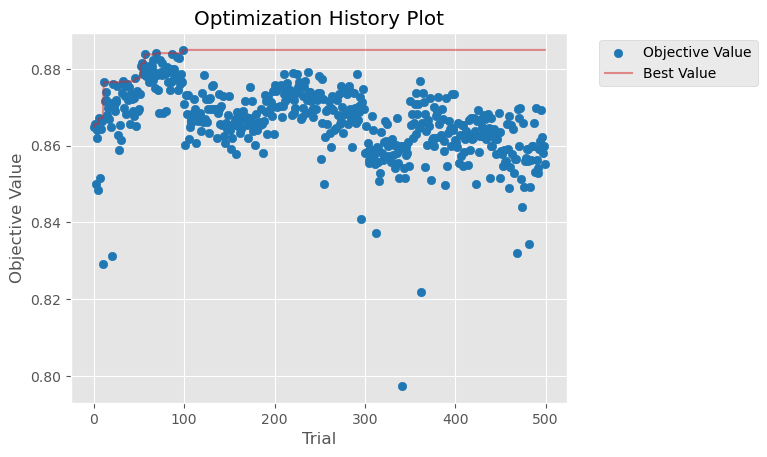

In [94]:
plot_optimization_history(study_xgb);

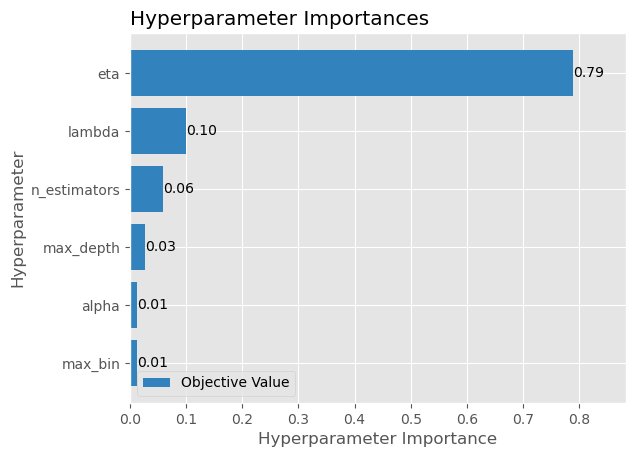

In [95]:
plot_param_importances(study_xgb);

In [96]:
detailed_objective_xgb_CV(study_xgb.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,TP,25.400000,3.098387
1,TN,97.000000,2.867442
2,FP,3.500000,2.838231
3,FN,8.000000,3.018462
4,Accuracy,0.914129,0.037739
5,Precision,0.881816,0.095218
6,Sensitivity,0.760387,0.091534
7,Specificity,0.965190,0.028195
8,F1 score,0.814631,0.084099
9,F1 score (weighted),0.911807,0.038997


In [97]:
mat_met_xgb_test['ave'] = mat_met_xgb_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_xgb_test['std'] = mat_met_xgb_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_xgb_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,43.000000,48.000000,50.000000,47.000000,42.000000,53.000000,52.000000,49.000000,49.000000,45.000000,47.800000,3.614784
1,TN,193.000000,189.000000,190.000000,191.000000,190.000000,191.000000,193.000000,190.000000,195.000000,196.000000,191.800000,2.347576
2,FP,6.000000,11.000000,11.000000,8.000000,10.000000,9.000000,7.000000,11.000000,7.000000,5.000000,8.500000,2.223611
3,FN,26.000000,20.000000,17.000000,22.000000,26.000000,15.000000,16.000000,18.000000,17.000000,22.000000,19.900000,3.984693
4,Accuracy,0.880597,0.884328,0.895522,0.888060,0.865672,0.910448,0.914179,0.891791,0.910448,0.899254,0.894030,0.015253
5,Precision,0.877551,0.813559,0.819672,0.854545,0.807692,0.854839,0.881356,0.816667,0.875000,0.900000,0.850088,0.033433
6,Sensitivity,0.623188,0.705882,0.746269,0.681159,0.617647,0.779412,0.764706,0.731343,0.742424,0.671642,0.706367,0.056653
7,Specificity,0.969800,0.945000,0.945300,0.959800,0.950000,0.955000,0.965000,0.945300,0.965300,0.975100,0.957560,0.011055
8,F1 score,0.728814,0.755906,0.781250,0.758065,0.700000,0.815385,0.818898,0.771654,0.803279,0.769231,0.770248,0.037454
9,F1 score (weighted),0.873335,0.881502,0.893842,0.883642,0.859300,0.909043,0.912082,0.889735,0.907859,0.893978,0.890432,0.016769


In [98]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)


Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_xgb=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_xgb = xgb.XGBClassifier(objective="binary:logistic",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=8,
                                    subsample=0.8, 
                                   )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_xgb.fit(X_train,y_train, 
            eval_set=eval_set,
            eval_metric=["logloss"],
            early_stopping_rounds=50,
            verbose= False,
                  )
                          
                  
        #print(test_idx)
        y_pred_optimized_xgb = optimizedCV_xgb.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_xgb': y_pred_optimized_xgb } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_xgb)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_xgb))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_xgb))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_xgb))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_xgb))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_xgb, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_xgb, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_xgb))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_xgb))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_xgb))
        
    data_xgb['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_xgb['y_test' + str(i)] = data_inner['y_test']
    data_xgb['y_pred_xgb' + str(i)] = data_inner['y_pred_xgb']
   # data_xgb['correct' + str(i)] = correct_value
   # data_xgb['pred' + str(i)] = y_pred_optimized_xgb

mat_met_optimized_xgb = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 
mat_met_optimized_xgb

,Metric,Value (average),Value (std)
0,Accuracy,0.910829,0.021558
1,Precision,0.873710,0.050177
2,Sensitivity,0.752712,0.069414
3,Specificity,0.963398,0.015591
4,F1 score,0.806939,0.050839
5,F1 score (weighted),0.908308,0.022817
6,F1 score (macro),0.874456,0.032137
7,Balanced Accuracy,0.858053,0.036121
8,MCC,0.754312,0.062008
9,NPV,0.921778,0.020479


In [99]:
#cross valide using this optimized XGBoost 
fit_params = {'early_stopping_rounds': 50, 
            'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
              'verbose' : False,
             }

xgb_baseline_CVscore = cross_val_score(xgb_clf, X, Y, cv=10, scoring="f1_macro", )
#cv_xgb_opt_testSet = cross_val_score(optimized_xgb, X, Y, cv=10, scoring="f1_macro", fit_params = fit_params)
cv_xgb_opt = cross_val_score(optimizedCV_xgb, X, Y, cv=10, scoring="f1_macro", fit_params = fit_params)
print("XGBoost baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(xgb_baseline_CVscore), np.std(xgb_baseline_CVscore, ddof=1)))
#print("XGBoost optimized model (tested with Y_te) f1_score %0.4f with a standard deviation of %0.4f" % (cv_xgb_opt_testSet.mean(), cv_xgb_opt_testSet.std()))
print("XGBoost optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_xgb_opt), np.std(cv_xgb_opt, ddof=1)))

[13:04:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [100]:
joblib.dump(xgb_clf, "OUTPUT/xgb_clf.joblib")
#joblib.dump(optimized_xgb, "OUTPUT/optimized_xgb.joblib")
joblib.dump(optimizedCV_xgb, "OUTPUT/optimizedCV_xgb_clf.joblib")


['OUTPUT/optimizedCV_xgb_clf.joblib']

## KNeighbors (KNN)

In [101]:
%%time


TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    knn_clf = KNeighborsClassifier()
    
    knn_clf.fit(X_train,y_train)

    y_pred = knn_clf.predict(X_test) 
    
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test, y_pred)
    Precision[idx] = precision_score(y_test, y_pred)
    Sensitivity[idx] = recall_score(y_test, y_pred)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test, y_pred)
    f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
    f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
    MCC[idx] = matthews_corrcoef(y_test, y_pred)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    TP        25.900000     2.233582
1                    TN        93.100000     3.784471
2                    FP         7.400000     3.657564
3                    FN         7.500000     2.068279
4              Accuracy         0.888733     0.030113
5             Precision         0.785618     0.085761
6           Sensitivity         0.775286     0.061937
7           Specificity         0.926350     0.036577
8              F1 score         0.777486     0.054745
9   F1 score (weighted)         0.888733     0.028943
10     F1 score (macro)         0.851575     0.037433
11    Balanced Accuracy         0.850815     0.034572
12                  MCC         0.705909     0.074972
13                  NPV         0.925800     0.018875
14              ROC_AUC         0.850815     0.034572
CPU times: user 857 ms, sys: 3.2 s, total: 4.06 s
Wall time: 132 ms


In [102]:
def objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 5, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggestegorical("device_type", ['gpu']),
        
    }
    
   
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsClassifier(**param_grid, n_jobs=8)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
    
    
        cv_scores[idx] = f1_score(y_test, y_pred, average='macro')
       
        
    return np.mean(cv_scores)

In [103]:
def detailed_objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 1, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggestegorical("device_type", ['gpu']),      
    }
    
  
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsClassifier(**param_grid, n_jobs=8)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
        
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
    

In [104]:
#Execute optuna and set hyperparameters
study_knn = optuna.create_study(direction='maximize', study_name="KNNClassifier")
func_knn_0 = lambda trial: objective_knn_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_knn.optimize(func_knn_0, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:05:03,973] A new study created in memory with name: KNNClassifier
[I 2023-12-05 13:05:04,196] Trial 0 finished with value: 0.8100831475282806 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 69}. Best is trial 0 with value: 0.8100831475282806.
[I 2023-12-05 13:05:04,350] Trial 1 finished with value: 0.8690343698307672 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 45}. Best is trial 1 with value: 0.8690343698307672.
[I 2023-12-05 13:05:04,510] Trial 2 finished with value: 0.7911903528041556 and parameters: {'n_neighbors': 26, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 44}. Best is trial 1 with value: 0.8690343698307672.
[I 2023-12-05 13:05:04,661] Trial 3 finished with value: 0.8081496410337131 and parameters: {'n_neighbors': 27, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 71}. Best is trial 1 with value: 0.8690343698307672.
[I 2023-12-05 13:05:04,8

	Number of trials: 50.0
	Best value (f1_score): 0.8759
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 28


In [105]:
#Create an instance with tuned hyperparameters

optimized_knn_0 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_0.fit(X_trainSet0,Y_trainSet0, )

# predict
y_pred_knn_0 = optimized_knn_0.predict(X_testSet0)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_knn_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_knn_0)
Precision = precision_score(Y_testSet0, y_pred_knn_0)
Sensitivity = recall_score(Y_testSet0, y_pred_knn_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_knn_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_knn_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_knn_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_knn_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_knn_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_knn_0)
    

mat_met_knn_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_knn_test)


                 Metric        Set0
0                    TP   44.000000
1                    TN  189.000000
2                    FP   10.000000
3                    FN   25.000000
4              Accuracy    0.869403
5             Precision    0.814815
6           Sensitivity    0.637681
7           Specificity    0.949700
8              F1 score    0.715447
9   F1 score (weighted)    0.863811
10     F1 score (macro)    0.815351
11    Balanced Accuracy    0.793715
12                  MCC    0.640329
13                  NPV    0.883200
14              ROC_AUC    0.793715


In [106]:
#Execute optuna and set hyperparameters

func_knn_1 = lambda trial: objective_knn_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_knn.optimize(func_knn_1, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:05:12,491] Trial 50 finished with value: 0.8179238247119061 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 50}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:12,646] Trial 51 finished with value: 0.864888506287657 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 78}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:12,815] Trial 52 finished with value: 0.8554092208027987 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 76}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:12,987] Trial 53 finished with value: 0.8661661989231533 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 64}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:13,188] Trial 54 finished with value: 0.864888506287657 and parameters: {'n_neig

	Number of trials: 100.0
	Best value (f1_score): 0.8759
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 28


In [107]:
#Create an instance with tuned hyperparameters

optimized_knn_1 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_1.fit(X_trainSet1,Y_trainSet1, )

# predict
y_pred_knn_1 = optimized_knn_1.predict(X_testSet1)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_knn_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_knn_1)
Precision = precision_score(Y_testSet1, y_pred_knn_1)
Sensitivity = recall_score(Y_testSet1, y_pred_knn_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_knn_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_knn_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_knn_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_knn_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_knn_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_knn_1)
    

set1 = pd.DataFrame({'Set1':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set1'] = set1
print(mat_met_knn_test)


                 Metric        Set0        Set1
0                    TP   44.000000   53.000000
1                    TN  189.000000  178.000000
2                    FP   10.000000   22.000000
3                    FN   25.000000   15.000000
4              Accuracy    0.869403    0.861940
5             Precision    0.814815    0.706667
6           Sensitivity    0.637681    0.779412
7           Specificity    0.949700    0.890000
8              F1 score    0.715447    0.741259
9   F1 score (weighted)    0.863811    0.864090
10     F1 score (macro)    0.815351    0.823556
11    Balanced Accuracy    0.793715    0.834706
12                  MCC    0.640329    0.648864
13                  NPV    0.883200    0.922300
14              ROC_AUC    0.793715    0.834706


In [108]:
#Execute optuna and set hyperparameters

func_knn_2 = lambda trial: objective_knn_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_knn.optimize(func_knn_2, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:05:20,991] Trial 100 finished with value: 0.8408904205461937 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 20}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:21,156] Trial 101 finished with value: 0.8646099551005471 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 27}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:21,343] Trial 102 finished with value: 0.8659878640713286 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 32}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:21,519] Trial 103 finished with value: 0.8684825297108973 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 35}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:21,697] Trial 104 finished with value: 0.8592238468077043 and parameters: {

	Number of trials: 150.0
	Best value (f1_score): 0.8759
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 28


In [109]:
#Create an instance with tuned hyperparameters

optimized_knn_2 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_2.fit(X_trainSet2,Y_trainSet2, )
#predict
y_pred_knn_2 = optimized_knn_2.predict(X_testSet2)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_knn_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_knn_2)
Precision = precision_score(Y_testSet2, y_pred_knn_2)
Sensitivity = recall_score(Y_testSet2, y_pred_knn_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_knn_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_knn_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_knn_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_knn_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_knn_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_knn_2)
    

Set2 = pd.DataFrame({'Set2':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set2'] = Set2
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2
0                    TP   44.000000   53.000000   48.000000
1                    TN  189.000000  178.000000  184.000000
2                    FP   10.000000   22.000000   17.000000
3                    FN   25.000000   15.000000   19.000000
4              Accuracy    0.869403    0.861940    0.865672
5             Precision    0.814815    0.706667    0.738462
6           Sensitivity    0.637681    0.779412    0.716418
7           Specificity    0.949700    0.890000    0.915400
8              F1 score    0.715447    0.741259    0.727273
9   F1 score (weighted)    0.863811    0.864090    0.864986
10     F1 score (macro)    0.815351    0.823556    0.819082
11    Balanced Accuracy    0.793715    0.834706    0.815920
12                  MCC    0.640329    0.648864    0.638320
13                  NPV    0.883200    0.922300    0.906400
14              ROC_AUC    0.793715    0.834706    0.815920


In [110]:
#Execute optuna and set hyperparameters

func_knn_3 = lambda trial: objective_knn_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_knn.optimize(func_knn_3, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:05:29,930] Trial 150 finished with value: 0.8545814049385919 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 27}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:30,094] Trial 151 finished with value: 0.8553017046893026 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 46}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:30,269] Trial 152 finished with value: 0.8642640372466938 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 42}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:30,444] Trial 153 finished with value: 0.8675327178837874 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 40}. Best is trial 12 with value: 0.8759093489450274.
[I 2023-12-05 13:05:30,612] Trial 154 finished with value: 0.8627481580660836 and parameters: 

	Number of trials: 200.0
	Best value (f1_score): 0.8759
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 28


In [111]:
#Create an instance with tuned hyperparameters

optimized_knn_3 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_3.fit(X_trainSet3,Y_trainSet3, )

# predict
y_pred_knn_3 = optimized_knn_3.predict(X_testSet3)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_knn_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_knn_3)
Precision = precision_score(Y_testSet3, y_pred_knn_3)
Sensitivity = recall_score(Y_testSet3, y_pred_knn_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_knn_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_knn_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_knn_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_knn_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_knn_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_knn_3)
    

Set3 = pd.DataFrame({'Set3':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set3'] = Set3
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   44.000000   53.000000   48.000000   49.000000
1                    TN  189.000000  178.000000  184.000000  192.000000
2                    FP   10.000000   22.000000   17.000000    7.000000
3                    FN   25.000000   15.000000   19.000000   20.000000
4              Accuracy    0.869403    0.861940    0.865672    0.899254
5             Precision    0.814815    0.706667    0.738462    0.875000
6           Sensitivity    0.637681    0.779412    0.716418    0.710145
7           Specificity    0.949700    0.890000    0.915400    0.964800
8              F1 score    0.715447    0.741259    0.727273    0.784000
9   F1 score (weighted)    0.863811    0.864090    0.864986    0.895608
10     F1 score (macro)    0.815351    0.823556    0.819082    0.859153
11    Balanced Accuracy    0.793715    0.834706    0.815920    0.837485
12                  MCC    0.640329    0.648864    0.638320    0

In [112]:
#Execute optuna and set hyperparameters

func_knn_4 = lambda trial: objective_knn_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_knn.optimize(func_knn_4, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:05:38,681] Trial 200 finished with value: 0.8789452602969373 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 51}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:38,857] Trial 201 finished with value: 0.8789452602969373 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 51}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:39,020] Trial 202 finished with value: 0.8789452602969373 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 51}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:39,201] Trial 203 finished with value: 0.8699658670298082 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 47}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:39,379] Trial 204 finished with value: 0.8789452602969373 and parameters

	Number of trials: 250.0
	Best value (f1_score): 0.8789
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 51


In [113]:
#Create an instance with tuned hyperparameters

optimized_knn_4 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_4.fit(X_trainSet4,Y_trainSet4, )

# predict
y_pred_knn_4 = optimized_knn_4.predict(X_testSet4)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_knn_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_knn_4)
Precision = precision_score(Y_testSet4, y_pred_knn_4)
Sensitivity = recall_score(Y_testSet4, y_pred_knn_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_knn_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_knn_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_knn_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_knn_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_knn_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_knn_4)
    

Set4 = pd.DataFrame({'Set4':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set4'] = Set4
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   53.000000   48.000000   49.000000   
1                    TN  189.000000  178.000000  184.000000  192.000000   
2                    FP   10.000000   22.000000   17.000000    7.000000   
3                    FN   25.000000   15.000000   19.000000   20.000000   
4              Accuracy    0.869403    0.861940    0.865672    0.899254   
5             Precision    0.814815    0.706667    0.738462    0.875000   
6           Sensitivity    0.637681    0.779412    0.716418    0.710145   
7           Specificity    0.949700    0.890000    0.915400    0.964800   
8              F1 score    0.715447    0.741259    0.727273    0.784000   
9   F1 score (weighted)    0.863811    0.864090    0.864986    0.895608   
10     F1 score (macro)    0.815351    0.823556    0.819082    0.859153   
11    Balanced Accuracy    0.793715    0.834706    0.815920    0.837485   
12                  MCC  

In [114]:
#Execute optuna and set hyperparameters

func_knn_5 = lambda trial: objective_knn_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_knn.optimize(func_knn_5, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:05:47,561] Trial 250 finished with value: 0.8608221433637968 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 45}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:47,743] Trial 251 finished with value: 0.8608221433637968 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 43}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:47,922] Trial 252 finished with value: 0.8608221433637968 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 48}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:48,112] Trial 253 finished with value: 0.8559011467970172 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 45}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:48,291] Trial 254 finished with value: 0.861303249683431 and parameters:

	Number of trials: 300.0
	Best value (f1_score): 0.8789
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 51


In [115]:
#Create an instance with tuned hyperparameters

optimized_knn_5 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_5.fit(X_trainSet5,Y_trainSet5, )

# predict
y_pred_knn_5 = optimized_knn_5.predict(X_testSet5)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_knn_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_knn_5)
Precision = precision_score(Y_testSet5, y_pred_knn_5)
Sensitivity = recall_score(Y_testSet5, y_pred_knn_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_knn_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_knn_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_knn_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_knn_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_knn_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_knn_5)
    

Set5 = pd.DataFrame({'Set5':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set5'] = Set5
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   53.000000   48.000000   49.000000   
1                    TN  189.000000  178.000000  184.000000  192.000000   
2                    FP   10.000000   22.000000   17.000000    7.000000   
3                    FN   25.000000   15.000000   19.000000   20.000000   
4              Accuracy    0.869403    0.861940    0.865672    0.899254   
5             Precision    0.814815    0.706667    0.738462    0.875000   
6           Sensitivity    0.637681    0.779412    0.716418    0.710145   
7           Specificity    0.949700    0.890000    0.915400    0.964800   
8              F1 score    0.715447    0.741259    0.727273    0.784000   
9   F1 score (weighted)    0.863811    0.864090    0.864986    0.895608   
10     F1 score (macro)    0.815351    0.823556    0.819082    0.859153   
11    Balanced Accuracy    0.793715    0.834706    0.815920    0.837485   
12                  MCC  

In [116]:
#Execute optuna and set hyperparameters

func_knn_6 = lambda trial: objective_knn_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_knn.optimize(func_knn_6, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:05:56,295] Trial 300 finished with value: 0.8388243464231957 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 43}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:56,467] Trial 301 finished with value: 0.841004915424854 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 45}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:56,629] Trial 302 finished with value: 0.841226789562473 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 48}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:56,791] Trial 303 finished with value: 0.8365313258885042 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 50}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:05:56,958] Trial 304 finished with value: 0.841226789562473 and parameters: {

	Number of trials: 350.0
	Best value (f1_score): 0.8789
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 51


In [117]:
#Create an instance with tuned hyperparameters

optimized_knn_6 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_6.fit(X_trainSet6,Y_trainSet6, )

# predict
y_pred_knn_6 = optimized_knn_6.predict(X_testSet6)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_knn_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_knn_6)
Precision = precision_score(Y_testSet6, y_pred_knn_6)
Sensitivity = recall_score(Y_testSet6, y_pred_knn_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_knn_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_knn_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_knn_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_knn_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_knn_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_knn_6)
    

Set6 = pd.DataFrame({'Set6':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set6'] = Set6
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   53.000000   48.000000   49.000000   
1                    TN  189.000000  178.000000  184.000000  192.000000   
2                    FP   10.000000   22.000000   17.000000    7.000000   
3                    FN   25.000000   15.000000   19.000000   20.000000   
4              Accuracy    0.869403    0.861940    0.865672    0.899254   
5             Precision    0.814815    0.706667    0.738462    0.875000   
6           Sensitivity    0.637681    0.779412    0.716418    0.710145   
7           Specificity    0.949700    0.890000    0.915400    0.964800   
8              F1 score    0.715447    0.741259    0.727273    0.784000   
9   F1 score (weighted)    0.863811    0.864090    0.864986    0.895608   
10     F1 score (macro)    0.815351    0.823556    0.819082    0.859153   
11    Balanced Accuracy    0.793715    0.834706    0.815920    0.837485   
12                  MCC  

In [118]:
#Execute optuna and set hyperparameters

func_knn_7 = lambda trial: objective_knn_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_knn.optimize(func_knn_7, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:06:04,973] Trial 350 finished with value: 0.8576924153394095 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 49}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:05,135] Trial 351 finished with value: 0.8607210019005251 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 42}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:05,299] Trial 352 finished with value: 0.8624848381018826 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 47}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:05,484] Trial 353 finished with value: 0.8607210019005251 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 45}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:05,656] Trial 354 finished with value: 0.8333568650612813 and parameters

	Number of trials: 400.0
	Best value (f1_score): 0.8789
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 51


In [119]:
#Create an instance with tuned hyperparameters

optimized_knn_7 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_7.fit(X_trainSet7,Y_trainSet7, )

# predict
y_pred_knn_7 = optimized_knn_7.predict(X_testSet7)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_knn_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_knn_7)
Precision = precision_score(Y_testSet7, y_pred_knn_7)
Sensitivity = recall_score(Y_testSet7, y_pred_knn_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_knn_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_knn_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_knn_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_knn_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_knn_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_knn_7)
    

Set7 = pd.DataFrame({'Set7':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set7'] = Set7
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   53.000000   48.000000   49.000000   
1                    TN  189.000000  178.000000  184.000000  192.000000   
2                    FP   10.000000   22.000000   17.000000    7.000000   
3                    FN   25.000000   15.000000   19.000000   20.000000   
4              Accuracy    0.869403    0.861940    0.865672    0.899254   
5             Precision    0.814815    0.706667    0.738462    0.875000   
6           Sensitivity    0.637681    0.779412    0.716418    0.710145   
7           Specificity    0.949700    0.890000    0.915400    0.964800   
8              F1 score    0.715447    0.741259    0.727273    0.784000   
9   F1 score (weighted)    0.863811    0.864090    0.864986    0.895608   
10     F1 score (macro)    0.815351    0.823556    0.819082    0.859153   
11    Balanced Accuracy    0.793715    0.834706    0.815920    0.837485   
12                  MCC  

In [120]:
#Execute optuna and set hyperparameters

func_knn_8 = lambda trial: objective_knn_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_knn.optimize(func_knn_8, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:06:13,820] Trial 400 finished with value: 0.8432587254704986 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 46}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:14,006] Trial 401 finished with value: 0.8507596490039401 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 48}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:14,197] Trial 402 finished with value: 0.8432587254704986 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 44}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:14,376] Trial 403 finished with value: 0.8323419268773689 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 52}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:14,558] Trial 404 finished with value: 0.8447567183217345 and parameters

	Number of trials: 450.0
	Best value (f1_score): 0.8789
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 51


In [121]:
#Create an instance with tuned hyperparameters

optimized_knn_8 =  KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_8.fit(X_trainSet8,Y_trainSet8, )

# predict
y_pred_knn_8 = optimized_knn_8.predict(X_testSet8)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_knn_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_knn_8)
Precision = precision_score(Y_testSet8, y_pred_knn_8)
Sensitivity = recall_score(Y_testSet8, y_pred_knn_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_knn_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_knn_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_knn_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_knn_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_knn_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_knn_8)
    

Set8 = pd.DataFrame({'Set8':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set8'] = Set8
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   53.000000   48.000000   49.000000   
1                    TN  189.000000  178.000000  184.000000  192.000000   
2                    FP   10.000000   22.000000   17.000000    7.000000   
3                    FN   25.000000   15.000000   19.000000   20.000000   
4              Accuracy    0.869403    0.861940    0.865672    0.899254   
5             Precision    0.814815    0.706667    0.738462    0.875000   
6           Sensitivity    0.637681    0.779412    0.716418    0.710145   
7           Specificity    0.949700    0.890000    0.915400    0.964800   
8              F1 score    0.715447    0.741259    0.727273    0.784000   
9   F1 score (weighted)    0.863811    0.864090    0.864986    0.895608   
10     F1 score (macro)    0.815351    0.823556    0.819082    0.859153   
11    Balanced Accuracy    0.793715    0.834706    0.815920    0.837485   
12                  MCC  

In [122]:
#Execute optuna and set hyperparameters

func_knn_9 = lambda trial: objective_knn_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_knn.optimize(func_knn_9, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (f1_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:06:22,896] Trial 450 finished with value: 0.8396926478878972 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 46}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:23,062] Trial 451 finished with value: 0.8502503059496478 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 47}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:23,235] Trial 452 finished with value: 0.8558378054019966 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 41}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:23,426] Trial 453 finished with value: 0.8477240364029729 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 37}. Best is trial 200 with value: 0.8789452602969373.
[I 2023-12-05 13:06:23,601] Trial 454 finished with value: 0.8529595681036678 and parameters:

	Number of trials: 500.0
	Best value (f1_score): 0.8789
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 51


In [123]:
#Create an instance with tuned hyperparameters

optimized_knn_9 = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )

    
#learn


optimized_knn_9.fit(X_trainSet9,Y_trainSet9, )

# predict
y_pred_knn_9 = optimized_knn_9.predict(X_testSet9)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_knn_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_knn_9)
Precision = precision_score(Y_testSet9, y_pred_knn_9)
Sensitivity = recall_score(Y_testSet9, y_pred_knn_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_knn_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_knn_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_knn_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_knn_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_knn_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_knn_9)
    

Set9 = pd.DataFrame({'Set9':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set9'] = Set9
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   44.000000   53.000000   48.000000   49.000000   
1                    TN  189.000000  178.000000  184.000000  192.000000   
2                    FP   10.000000   22.000000   17.000000    7.000000   
3                    FN   25.000000   15.000000   19.000000   20.000000   
4              Accuracy    0.869403    0.861940    0.865672    0.899254   
5             Precision    0.814815    0.706667    0.738462    0.875000   
6           Sensitivity    0.637681    0.779412    0.716418    0.710145   
7           Specificity    0.949700    0.890000    0.915400    0.964800   
8              F1 score    0.715447    0.741259    0.727273    0.784000   
9   F1 score (weighted)    0.863811    0.864090    0.864986    0.895608   
10     F1 score (macro)    0.815351    0.823556    0.819082    0.859153   
11    Balanced Accuracy    0.793715    0.834706    0.815920    0.837485   
12                  MCC  

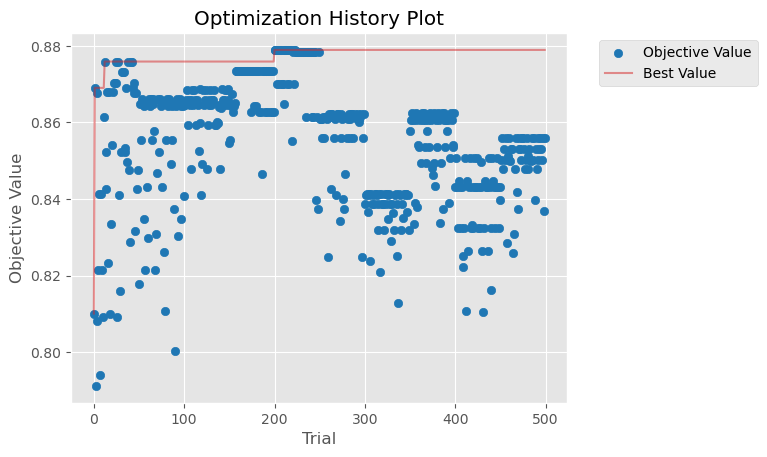

In [124]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_knn);

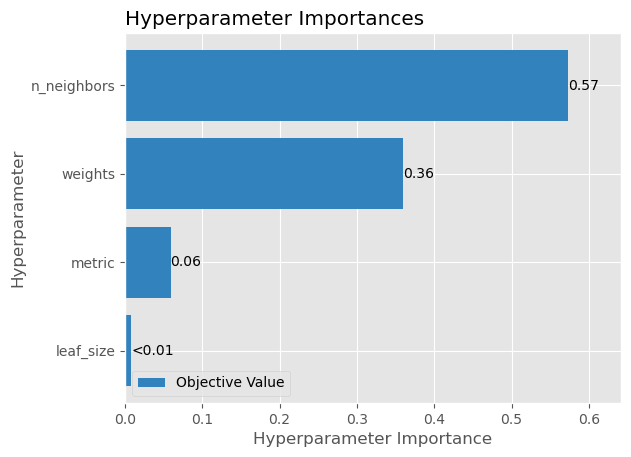

In [125]:

plot_param_importances(study_knn);

In [126]:
detailed_objective_knn_CV(study_knn.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,TP,27.200000,2.699794
1,TN,93.600000,3.405877
2,FP,6.900000,3.281260
3,FN,6.200000,2.394438
4,Accuracy,0.902171,0.030941
5,Precision,0.802830,0.080434
6,Sensitivity,0.813888,0.072922
7,Specificity,0.931330,0.032815
8,F1 score,0.806042,0.060864
9,F1 score (weighted),0.902494,0.030430


In [127]:
mat_met_knn_test['ave'] = mat_met_knn_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_knn_test['std'] = mat_met_knn_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_knn_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,44.000000,53.000000,48.000000,49.000000,50.000000,58.000000,57.000000,53.000000,53.000000,52.000000,51.700000,4.164666
1,TN,189.000000,178.000000,184.000000,192.000000,182.000000,189.000000,192.000000,188.000000,190.000000,190.000000,187.400000,4.599517
2,FP,10.000000,22.000000,17.000000,7.000000,18.000000,11.000000,8.000000,13.000000,12.000000,11.000000,12.900000,4.724640
3,FN,25.000000,15.000000,19.000000,20.000000,18.000000,10.000000,11.000000,14.000000,13.000000,15.000000,16.000000,4.546061
4,Accuracy,0.869403,0.861940,0.865672,0.899254,0.865672,0.921642,0.929104,0.899254,0.906716,0.902985,0.892164,0.024717
5,Precision,0.814815,0.706667,0.738462,0.875000,0.735294,0.840580,0.876923,0.803030,0.815385,0.825397,0.803155,0.058580
6,Sensitivity,0.637681,0.779412,0.716418,0.710145,0.735294,0.852941,0.838235,0.791045,0.803030,0.776119,0.764032,0.064983
7,Specificity,0.949700,0.890000,0.915400,0.964800,0.910000,0.945000,0.960000,0.935300,0.940600,0.945300,0.935610,0.023563
8,F1 score,0.715447,0.741259,0.727273,0.784000,0.735294,0.846715,0.857143,0.796992,0.809160,0.800000,0.781328,0.049873
9,F1 score (weighted),0.863811,0.864090,0.864986,0.895608,0.865672,0.921830,0.928569,0.899000,0.906476,0.901970,0.891201,0.024918


In [128]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)


Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_knn=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_knn = KNeighborsClassifier(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=8,
                                                 )


        #learn
        
        optimizedCV_knn.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_knn = optimizedCV_knn.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_knn': y_pred_optimized_knn } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_knn)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_knn))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_knn))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_knn))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_knn))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_knn, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_knn, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_knn))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_knn))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_knn))
        
    data_knn['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_knn['y_test' + str(i)] = data_inner['y_test']
    data_knn['y_pred_knn' + str(i)] = data_inner['y_pred_knn']
   # data_knn['correct' + str(i)] = correct_value
   # data_knn['pred' + str(i)] = y_pred_optimized_knn

mat_met_optimized_knn = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [ np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 

mat_met_optimized_knn

,Metric,Value (average),Value (std)
0,Accuracy,0.903956,0.026697
1,Precision,0.807549,0.063648
2,Sensitivity,0.813916,0.065636
3,Specificity,0.933958,0.027399
4,F1 score,0.808658,0.051339
5,F1 score (weighted),0.904096,0.026250
6,F1 score (macro),0.872225,0.034520
7,Balanced Accuracy,0.873934,0.035980
8,MCC,0.746392,0.067806
9,NPV,0.938210,0.020694


In [129]:
#cross valide using this optimized KNN 
knn_baseline_CVscore = cross_val_score(knn_clf, X, Y, cv=10, scoring="f1_macro")
#cv_knn_opt_testSet = cross_val_score(optimized_knn, X, Y, cv=10, scoring="f1_macro")
cv_knn_opt = cross_val_score(optimizedCV_knn, X, Y, cv=10, scoring="f1_macro")
print("KNN baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(knn_baseline_CVscore), np.std(knn_baseline_CVscore, ddof=1)))
#print("KNN optimized model (tested on Y_te) f1_score %0.4f with a standard deviation of %0.4f" % (cv_knn_opt_testSet.mean(), cv_knn_opt_testSet.std()))
print("KNN optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_knn_opt), np.std(cv_knn_opt, ddof=1)))

KNN baseline model f1_score 0.8577 with a standard deviation of 0.0362
KNN optimized model f1_score 0.8772 with a standard deviation of 0.0383


In [130]:
joblib.dump(knn_clf, "OUTPUT/knn_clf.joblib")
#joblib.dump(optimized_knn, "OUTPUT/optimized_knn.joblib")
joblib.dump(optimizedCV_knn, "OUTPUT/optimizedCV_knn_clf.joblib")
#loaded_rf = joblib.load("OUTPUT/optimized_rf.joblib")

['OUTPUT/optimizedCV_knn_clf.joblib']

## Support Vector 

In [131]:
%%time


TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    svm_clf = SVC()
    
    svm_clf.fit(X_train, y_train, )

    y_pred = svm_clf.predict(X_test) 
   
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test, y_pred)
    Precision[idx] = precision_score(y_test, y_pred)
    Sensitivity[idx] = recall_score(y_test, y_pred)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test, y_pred)
    f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
    f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
    MCC[idx] = matthews_corrcoef(y_test, y_pred)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    TP        23.600000     3.470511
1                    TN        96.500000     2.953341
2                    FP         4.000000     2.828427
3                    FN         9.800000     3.392803
4              Accuracy         0.896964     0.039407
5             Precision         0.857328     0.098769
6           Sensitivity         0.706460     0.102594
7           Specificity         0.960190     0.028229
8              F1 score         0.772140     0.092280
9   F1 score (weighted)         0.893163     0.041551
10     F1 score (macro)         0.852736     0.058503
11    Balanced Accuracy         0.833323     0.058771
12                  MCC         0.713805     0.115274
13                  NPV         0.908320     0.029692
14              ROC_AUC         0.833323     0.058771
CPU times: user 1.32 s, sys: 4 ms, total: 1.33 s
Wall time: 1.33 s


In [132]:
def objective_svm_CV(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggestegorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggestegorical("device_type", ['gpu'])
        
    }
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVC(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
    
    
        cv_scores[idx] = f1_score(y_test, y_pred, average='macro')
       
        
    return np.mean(cv_scores)


In [133]:
def detailed_objective_svm_cv(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggestegorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggestegorical("device_type", ['gpu']),
        
    }
    
  
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVC(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
        
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test, y_pred)
        Precision[idx] = precision_score(y_test, y_pred)
        Sensitivity[idx] = recall_score(y_test, y_pred)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test, y_pred)
        f1_scores_W[idx] = f1_score(y_test, y_pred, average="weighted")
        f1_scores_M[idx] = f1_score(y_test, y_pred, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test, y_pred)
        MCC[idx] = matthews_corrcoef(y_test, y_pred)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test, y_pred)


    mat_met = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
   

In [134]:
#Execute optuna and set hyperparameters
study_svm = optuna.create_study(direction='maximize', study_name="SVM_classifier")
func_svm_0 = lambda trial: objective_svm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_svm.optimize(func_svm_0, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:06:36,698] A new study created in memory with name: SVM_classifier
[I 2023-12-05 13:06:37,763] Trial 0 finished with value: 0.4294056694244429 and parameters: {'C': 0.03125, 'gamma': 0.03125}. Best is trial 0 with value: 0.4294056694244429.
[I 2023-12-05 13:06:39,229] Trial 1 finished with value: 0.4294056694244429 and parameters: {'C': 0.125, 'gamma': 2.0}. Best is trial 0 with value: 0.4294056694244429.
[I 2023-12-05 13:06:40,007] Trial 2 finished with value: 0.6800016591887666 and parameters: {'C': 32.0, 'gamma': 3.0517578125e-05}. Best is trial 2 with value: 0.6800016591887666.
[I 2023-12-05 13:06:40,797] Trial 3 finished with value: 0.6800016591887666 and parameters: {'C': 8.0, 'gamma': 0.0001220703125}. Best is trial 2 with value: 0.6800016591887666.
[I 2023-12-05 13:06:42,246] Trial 4 finished with value: 0.45567028715217983 and parameters: {'C': 64.0, 'gamma': 0.5}. Best is trial 2 with value: 0.6800016591887666.
[I 2023-12-05 13:06:43,681] Trial 5 finished wit

	Number of trials: 50.0
	Best value (f1_score): 0.8833
	Best params:
		C: 4.0
		gamma: 0.015625


In [135]:
#Create an instance with tuned hyperparameters

optimized_svm_0 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_0.fit(X_trainSet0,Y_trainSet0,)

# predict
y_pred_svm_0 = optimized_svm_0.predict(X_testSet0)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0, y_pred_svm_0)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0, y_pred_svm_0)
Precision = precision_score(Y_testSet0, y_pred_svm_0)
Sensitivity = recall_score(Y_testSet0, y_pred_svm_0)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0, y_pred_svm_0)      
f1_scores_W = f1_score(Y_testSet0, y_pred_svm_0, average="weighted")
f1_scores_M = f1_score(Y_testSet0, y_pred_svm_0, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0, y_pred_svm_0)
MCC = matthews_corrcoef(Y_testSet0, y_pred_svm_0)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0, y_pred_svm_0)
    

mat_met_svm_test = pd.DataFrame({'Metric':['TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_svm_test)


                 Metric        Set0
0                    TP   46.000000
1                    TN  194.000000
2                    FP    5.000000
3                    FN   23.000000
4              Accuracy    0.895522
5             Precision    0.901961
6           Sensitivity    0.666667
7           Specificity    0.974900
8              F1 score    0.766667
9   F1 score (weighted)    0.889947
10     F1 score (macro)    0.849679
11    Balanced Accuracy    0.820771
12                  MCC    0.714596
13                  NPV    0.894000
14              ROC_AUC    0.820771


In [136]:
#Execute optuna and set hyperparameters
func_svm_1 = lambda trial: objective_svm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_svm.optimize(func_svm_1, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:07:29,652] Trial 50 finished with value: 0.4290845621395481 and parameters: {'C': 0.03125, 'gamma': 0.015625}. Best is trial 45 with value: 0.8832928213560056.
[I 2023-12-05 13:07:30,797] Trial 51 finished with value: 0.8877302872518846 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:07:31,928] Trial 52 finished with value: 0.8877302872518846 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:07:32,663] Trial 53 finished with value: 0.8173730320997838 and parameters: {'C': 128.0, 'gamma': 3.0517578125e-05}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:07:34,056] Trial 54 finished with value: 0.5757399123908628 and parameters: {'C': 128.0, 'gamma': 0.125}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:07:34,727] Trial 55 finished with value: 0.859688014757471 and parameters: {'C': 128.0, 'gamma': 0.00

	Number of trials: 100.0
	Best value (f1_score): 0.8877
	Best params:
		C: 128.0
		gamma: 0.015625


In [137]:
#Create an instance with tuned hyperparameters

optimized_svm_1 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_1.fit(X_trainSet1,Y_trainSet1,)

# predict
y_pred_svm_1 = optimized_svm_1.predict(X_testSet1)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1, y_pred_svm_1)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1, y_pred_svm_1)
Precision = precision_score(Y_testSet1, y_pred_svm_1)
Sensitivity = recall_score(Y_testSet1, y_pred_svm_1)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1, y_pred_svm_1)      
f1_scores_W = f1_score(Y_testSet1, y_pred_svm_1, average="weighted")
f1_scores_M = f1_score(Y_testSet1, y_pred_svm_1, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1, y_pred_svm_1)
MCC = matthews_corrcoef(Y_testSet1, y_pred_svm_1)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1, y_pred_svm_1)
    

set1 = pd.DataFrame({'Set1':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set1'] = set1
print(mat_met_svm_test)


                 Metric        Set0        Set1
0                    TP   46.000000   50.000000
1                    TN  194.000000  185.000000
2                    FP    5.000000   15.000000
3                    FN   23.000000   18.000000
4              Accuracy    0.895522    0.876866
5             Precision    0.901961    0.769231
6           Sensitivity    0.666667    0.735294
7           Specificity    0.974900    0.925000
8              F1 score    0.766667    0.751880
9   F1 score (weighted)    0.889947    0.875935
10     F1 score (macro)    0.849679    0.834997
11    Balanced Accuracy    0.820771    0.830147
12                  MCC    0.714596    0.670351
13                  NPV    0.894000    0.911300
14              ROC_AUC    0.820771    0.830147


In [138]:
#Execute optuna and set hyperparameters
func_svm_2 = lambda trial: objective_svm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_svm.optimize(func_svm_2, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:08:24,957] Trial 100 finished with value: 0.42879040865737944 and parameters: {'C': 0.5, 'gamma': 1.0}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:08:26,040] Trial 101 finished with value: 0.8690653261072558 and parameters: {'C': 64.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:08:27,144] Trial 102 finished with value: 0.8690653261072558 and parameters: {'C': 64.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:08:28,238] Trial 103 finished with value: 0.8690653261072558 and parameters: {'C': 64.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:08:29,519] Trial 104 finished with value: 0.8782606522408418 and parameters: {'C': 64.0, 'gamma': 0.03125}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:08:30,206] Trial 105 finished with value: 0.42879040865737944 and parameters: {'C': 0.0078125, 'gamma': 6.10351562

	Number of trials: 150.0
	Best value (f1_score): 0.8877
	Best params:
		C: 128.0
		gamma: 0.015625


In [139]:
#Create an instance with tuned hyperparameters

optimized_svm_2 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_2.fit(X_trainSet2,Y_trainSet2,)

# predict
y_pred_svm_2 = optimized_svm_2.predict(X_testSet2)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2, y_pred_svm_2)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2, y_pred_svm_2)
Precision = precision_score(Y_testSet2, y_pred_svm_2)
Sensitivity = recall_score(Y_testSet2, y_pred_svm_2)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2, y_pred_svm_2)      
f1_scores_W = f1_score(Y_testSet2, y_pred_svm_2, average="weighted")
f1_scores_M = f1_score(Y_testSet2, y_pred_svm_2, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2, y_pred_svm_2)
MCC = matthews_corrcoef(Y_testSet2, y_pred_svm_2)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2, y_pred_svm_2)
    

Set2 = pd.DataFrame({'Set2':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set2'] = Set2
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2
0                    TP   46.000000   50.000000   51.000000
1                    TN  194.000000  185.000000  190.000000
2                    FP    5.000000   15.000000   11.000000
3                    FN   23.000000   18.000000   16.000000
4              Accuracy    0.895522    0.876866    0.899254
5             Precision    0.901961    0.769231    0.822581
6           Sensitivity    0.666667    0.735294    0.761194
7           Specificity    0.974900    0.925000    0.945300
8              F1 score    0.766667    0.751880    0.790698
9   F1 score (weighted)    0.889947    0.875935    0.897920
10     F1 score (macro)    0.849679    0.834997    0.862179
11    Balanced Accuracy    0.820771    0.830147    0.853234
12                  MCC    0.714596    0.670351    0.725435
13                  NPV    0.894000    0.911300    0.922300
14              ROC_AUC    0.820771    0.830147    0.853234


In [140]:
#Execute optuna and set hyperparameters
func_svm_3 = lambda trial: objective_svm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_svm.optimize(func_svm_3, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:09:17,454] Trial 150 finished with value: 0.4294023967607883 and parameters: {'C': 0.0625, 'gamma': 0.015625}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:09:18,584] Trial 151 finished with value: 0.8647640451905694 and parameters: {'C': 64.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:09:19,720] Trial 152 finished with value: 0.8647640451905694 and parameters: {'C': 64.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:09:20,842] Trial 153 finished with value: 0.8647640451905694 and parameters: {'C': 64.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:09:21,485] Trial 154 finished with value: 0.8490852584317166 and parameters: {'C': 64.0, 'gamma': 0.00048828125}. Best is trial 51 with value: 0.8877302872518846.
[I 2023-12-05 13:09:22,632] Trial 155 finished with value: 0.8684366506677392 and parameters: {'C': 16.0, 'gamma': 0.0

	Number of trials: 200.0
	Best value (f1_score): 0.8877
	Best params:
		C: 128.0
		gamma: 0.015625


In [141]:
#Create an instance with tuned hyperparameters

optimized_svm_3 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_3.fit(X_trainSet3,Y_trainSet3,)

# predict
y_pred_svm_3 = optimized_svm_3.predict(X_testSet3)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3, y_pred_svm_3)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3, y_pred_svm_3)
Precision = precision_score(Y_testSet3, y_pred_svm_3)
Sensitivity = recall_score(Y_testSet3, y_pred_svm_3)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3, y_pred_svm_3)      
f1_scores_W = f1_score(Y_testSet3, y_pred_svm_3, average="weighted")
f1_scores_M = f1_score(Y_testSet3, y_pred_svm_3, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3, y_pred_svm_3)
MCC = matthews_corrcoef(Y_testSet3, y_pred_svm_3)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3, y_pred_svm_3)
    

Set3 = pd.DataFrame({'Set3':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set3'] = Set3
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    TP   46.000000   50.000000   51.000000   50.000000
1                    TN  194.000000  185.000000  190.000000  190.000000
2                    FP    5.000000   15.000000   11.000000    9.000000
3                    FN   23.000000   18.000000   16.000000   19.000000
4              Accuracy    0.895522    0.876866    0.899254    0.895522
5             Precision    0.901961    0.769231    0.822581    0.847458
6           Sensitivity    0.666667    0.735294    0.761194    0.724638
7           Specificity    0.974900    0.925000    0.945300    0.954800
8              F1 score    0.766667    0.751880    0.790698    0.781250
9   F1 score (weighted)    0.889947    0.875935    0.897920    0.892722
10     F1 score (macro)    0.849679    0.834997    0.862179    0.856311
11    Balanced Accuracy    0.820771    0.830147    0.853234    0.839706
12                  MCC    0.714596    0.670351    0.725435    0

In [142]:
#Execute optuna and set hyperparameters
func_svm_4 = lambda trial: objective_svm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_svm.optimize(func_svm_4, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:10:10,840] Trial 200 finished with value: 0.8926701478362279 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:10:12,031] Trial 201 finished with value: 0.8926701478362279 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:10:13,231] Trial 202 finished with value: 0.8926701478362279 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:10:14,465] Trial 203 finished with value: 0.8926701478362279 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:10:15,698] Trial 204 finished with value: 0.8926701478362279 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:10:16,905] Trial 205 finished with value: 0.8926701478362279 and parameters: {'C': 128.0, 'gamma':

	Number of trials: 250.0
	Best value (f1_score): 0.8927
	Best params:
		C: 128.0
		gamma: 0.015625


In [143]:
#Create an instance with tuned hyperparameters

optimized_svm_4 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_4.fit(X_trainSet4,Y_trainSet4,)

# predict
y_pred_svm_4 = optimized_svm_4.predict(X_testSet4)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4, y_pred_svm_4)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4, y_pred_svm_4)
Precision = precision_score(Y_testSet4, y_pred_svm_4)
Sensitivity = recall_score(Y_testSet4, y_pred_svm_4)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4, y_pred_svm_4)      
f1_scores_W = f1_score(Y_testSet4, y_pred_svm_4, average="weighted")
f1_scores_M = f1_score(Y_testSet4, y_pred_svm_4, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4, y_pred_svm_4)
MCC = matthews_corrcoef(Y_testSet4, y_pred_svm_4)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4, y_pred_svm_4)
    

Set4 = pd.DataFrame({'Set4':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set4'] = Set4
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   46.000000   50.000000   51.000000   50.000000   
1                    TN  194.000000  185.000000  190.000000  190.000000   
2                    FP    5.000000   15.000000   11.000000    9.000000   
3                    FN   23.000000   18.000000   16.000000   19.000000   
4              Accuracy    0.895522    0.876866    0.899254    0.895522   
5             Precision    0.901961    0.769231    0.822581    0.847458   
6           Sensitivity    0.666667    0.735294    0.761194    0.724638   
7           Specificity    0.974900    0.925000    0.945300    0.954800   
8              F1 score    0.766667    0.751880    0.790698    0.781250   
9   F1 score (weighted)    0.889947    0.875935    0.897920    0.892722   
10     F1 score (macro)    0.849679    0.834997    0.862179    0.856311   
11    Balanced Accuracy    0.820771    0.830147    0.853234    0.839706   
12                  MCC  

In [144]:
#Execute optuna and set hyperparameters
func_svm_5 = lambda trial: objective_svm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_svm.optimize(func_svm_5, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:11:09,903] Trial 250 finished with value: 0.8274823042454033 and parameters: {'C': 128.0, 'gamma': 0.0625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:11:11,015] Trial 251 finished with value: 0.8752432814988795 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:11:12,569] Trial 252 finished with value: 0.44388121581472495 and parameters: {'C': 128.0, 'gamma': 8.0}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:11:13,691] Trial 253 finished with value: 0.8752432814988795 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:11:14,747] Trial 254 finished with value: 0.8696713727083184 and parameters: {'C': 128.0, 'gamma': 0.0078125}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:11:15,862] Trial 255 finished with value: 0.8752432814988795 and parameters: {'C': 128.0, 'gamma': 0.01

	Number of trials: 300.0
	Best value (f1_score): 0.8927
	Best params:
		C: 128.0
		gamma: 0.015625


In [145]:
#Create an instance with tuned hyperparameters

optimized_svm_5 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_5.fit(X_trainSet5,Y_trainSet5,)

# predict
y_pred_svm_5 = optimized_svm_5.predict(X_testSet5)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5, y_pred_svm_5)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5, y_pred_svm_5)
Precision = precision_score(Y_testSet5, y_pred_svm_5)
Sensitivity = recall_score(Y_testSet5, y_pred_svm_5)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5, y_pred_svm_5)      
f1_scores_W = f1_score(Y_testSet5, y_pred_svm_5, average="weighted")
f1_scores_M = f1_score(Y_testSet5, y_pred_svm_5, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5, y_pred_svm_5)
MCC = matthews_corrcoef(Y_testSet5, y_pred_svm_5)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5, y_pred_svm_5)
    

Set5 = pd.DataFrame({'Set5':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set5'] = Set5
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   46.000000   50.000000   51.000000   50.000000   
1                    TN  194.000000  185.000000  190.000000  190.000000   
2                    FP    5.000000   15.000000   11.000000    9.000000   
3                    FN   23.000000   18.000000   16.000000   19.000000   
4              Accuracy    0.895522    0.876866    0.899254    0.895522   
5             Precision    0.901961    0.769231    0.822581    0.847458   
6           Sensitivity    0.666667    0.735294    0.761194    0.724638   
7           Specificity    0.974900    0.925000    0.945300    0.954800   
8              F1 score    0.766667    0.751880    0.790698    0.781250   
9   F1 score (weighted)    0.889947    0.875935    0.897920    0.892722   
10     F1 score (macro)    0.849679    0.834997    0.862179    0.856311   
11    Balanced Accuracy    0.820771    0.830147    0.853234    0.839706   
12                  MCC  

In [146]:
#Execute optuna and set hyperparameters
func_svm_6 = lambda trial: objective_svm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_svm.optimize(func_svm_6, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:12:04,444] Trial 300 finished with value: 0.8455859513803228 and parameters: {'C': 4.0, 'gamma': 0.00390625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:12:05,657] Trial 301 finished with value: 0.8641574358252144 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:12:06,879] Trial 302 finished with value: 0.8641574358252144 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:12:07,742] Trial 303 finished with value: 0.4290977058643879 and parameters: {'C': 0.015625, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:12:08,626] Trial 304 finished with value: 0.5856269574485162 and parameters: {'C': 0.125, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:12:09,243] Trial 305 finished with value: 0.8517507221649627 and parameters: {'C': 128.0, 'gamm

	Number of trials: 350.0
	Best value (f1_score): 0.8927
	Best params:
		C: 128.0
		gamma: 0.015625


In [147]:
#Create an instance with tuned hyperparameters

optimized_svm_6 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_6.fit(X_trainSet6,Y_trainSet6,)

# predict
y_pred_svm_6 = optimized_svm_6.predict(X_testSet6)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6, y_pred_svm_6)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6, y_pred_svm_6)
Precision = precision_score(Y_testSet6, y_pred_svm_6)
Sensitivity = recall_score(Y_testSet6, y_pred_svm_6)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6, y_pred_svm_6)      
f1_scores_W = f1_score(Y_testSet6, y_pred_svm_6, average="weighted")
f1_scores_M = f1_score(Y_testSet6, y_pred_svm_6, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6, y_pred_svm_6)
MCC = matthews_corrcoef(Y_testSet6, y_pred_svm_6)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6, y_pred_svm_6)
    

Set6 = pd.DataFrame({'Set6':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set6'] = Set6
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   46.000000   50.000000   51.000000   50.000000   
1                    TN  194.000000  185.000000  190.000000  190.000000   
2                    FP    5.000000   15.000000   11.000000    9.000000   
3                    FN   23.000000   18.000000   16.000000   19.000000   
4              Accuracy    0.895522    0.876866    0.899254    0.895522   
5             Precision    0.901961    0.769231    0.822581    0.847458   
6           Sensitivity    0.666667    0.735294    0.761194    0.724638   
7           Specificity    0.974900    0.925000    0.945300    0.954800   
8              F1 score    0.766667    0.751880    0.790698    0.781250   
9   F1 score (weighted)    0.889947    0.875935    0.897920    0.892722   
10     F1 score (macro)    0.849679    0.834997    0.862179    0.856311   
11    Balanced Accuracy    0.820771    0.830147    0.853234    0.839706   
12                  MCC  

In [148]:
#Execute optuna and set hyperparameters
func_svm_7 = lambda trial: objective_svm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_svm.optimize(func_svm_7, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:12:58,767] Trial 350 finished with value: 0.4545290262106628 and parameters: {'C': 128.0, 'gamma': 1.0}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:12:59,897] Trial 351 finished with value: 0.8691216860192519 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:13:01,042] Trial 352 finished with value: 0.8691216860192519 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:13:02,319] Trial 353 finished with value: 0.8711472841565027 and parameters: {'C': 128.0, 'gamma': 0.03125}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:13:03,452] Trial 354 finished with value: 0.8691216860192519 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:13:04,229] Trial 355 finished with value: 0.4478203304068088 and parameters: {'C': 8.0, 'gamma': 6.10351

	Number of trials: 400.0
	Best value (f1_score): 0.8927
	Best params:
		C: 128.0
		gamma: 0.015625


In [149]:
#Create an instance with tuned hyperparameters

optimized_svm_7 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_7.fit(X_trainSet7,Y_trainSet7,)

# predict
y_pred_svm_7 = optimized_svm_7.predict(X_testSet7)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7, y_pred_svm_7)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7, y_pred_svm_7)
Precision = precision_score(Y_testSet7, y_pred_svm_7)
Sensitivity = recall_score(Y_testSet7, y_pred_svm_7)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7, y_pred_svm_7)      
f1_scores_W = f1_score(Y_testSet7, y_pred_svm_7, average="weighted")
f1_scores_M = f1_score(Y_testSet7, y_pred_svm_7, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7, y_pred_svm_7)
MCC = matthews_corrcoef(Y_testSet7, y_pred_svm_7)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7, y_pred_svm_7)
    

Set7 = pd.DataFrame({'Set7':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set7'] = Set7
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   46.000000   50.000000   51.000000   50.000000   
1                    TN  194.000000  185.000000  190.000000  190.000000   
2                    FP    5.000000   15.000000   11.000000    9.000000   
3                    FN   23.000000   18.000000   16.000000   19.000000   
4              Accuracy    0.895522    0.876866    0.899254    0.895522   
5             Precision    0.901961    0.769231    0.822581    0.847458   
6           Sensitivity    0.666667    0.735294    0.761194    0.724638   
7           Specificity    0.974900    0.925000    0.945300    0.954800   
8              F1 score    0.766667    0.751880    0.790698    0.781250   
9   F1 score (weighted)    0.889947    0.875935    0.897920    0.892722   
10     F1 score (macro)    0.849679    0.834997    0.862179    0.856311   
11    Balanced Accuracy    0.820771    0.830147    0.853234    0.839706   
12                  MCC  

In [150]:
#Execute optuna and set hyperparameters
func_svm_8 = lambda trial: objective_svm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_svm.optimize(func_svm_8, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:13:51,895] Trial 400 finished with value: 0.8705762811368392 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:13:53,095] Trial 401 finished with value: 0.8705762811368392 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:13:54,303] Trial 402 finished with value: 0.8705762811368392 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:13:54,929] Trial 403 finished with value: 0.8475794149672093 and parameters: {'C': 128.0, 'gamma': 0.00048828125}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:13:55,821] Trial 404 finished with value: 0.4284925962648115 and parameters: {'C': 0.03125, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:13:57,316] Trial 405 finished with value: 0.47841322209327625 and parameters: {'C': 128.0, 

	Number of trials: 450.0
	Best value (f1_score): 0.8927
	Best params:
		C: 128.0
		gamma: 0.015625


In [151]:
#Create an instance with tuned hyperparameters

optimized_svm_8 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_8.fit(X_trainSet8,Y_trainSet8,)

# predict
y_pred_svm_8 = optimized_svm_8.predict(X_testSet8)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8, y_pred_svm_8)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8, y_pred_svm_8)
Precision = precision_score(Y_testSet8, y_pred_svm_8)
Sensitivity = recall_score(Y_testSet8, y_pred_svm_8)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8, y_pred_svm_8)      
f1_scores_W = f1_score(Y_testSet8, y_pred_svm_8, average="weighted")
f1_scores_M = f1_score(Y_testSet8, y_pred_svm_8, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8, y_pred_svm_8)
MCC = matthews_corrcoef(Y_testSet8, y_pred_svm_8)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8, y_pred_svm_8)
    

Set8 = pd.DataFrame({'Set8':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set8'] = Set8
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   46.000000   50.000000   51.000000   50.000000   
1                    TN  194.000000  185.000000  190.000000  190.000000   
2                    FP    5.000000   15.000000   11.000000    9.000000   
3                    FN   23.000000   18.000000   16.000000   19.000000   
4              Accuracy    0.895522    0.876866    0.899254    0.895522   
5             Precision    0.901961    0.769231    0.822581    0.847458   
6           Sensitivity    0.666667    0.735294    0.761194    0.724638   
7           Specificity    0.974900    0.925000    0.945300    0.954800   
8              F1 score    0.766667    0.751880    0.790698    0.781250   
9   F1 score (weighted)    0.889947    0.875935    0.897920    0.892722   
10     F1 score (macro)    0.849679    0.834997    0.862179    0.856311   
11    Balanced Accuracy    0.820771    0.830147    0.853234    0.839706   
12                  MCC  

In [152]:
#Execute optuna and set hyperparameters
func_svm_9 = lambda trial: objective_svm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_svm.optimize(func_svm_9, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (f1_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-05 13:14:49,125] Trial 450 finished with value: 0.42879695398468864 and parameters: {'C': 0.015625, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:14:50,275] Trial 451 finished with value: 0.8659211512149696 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:14:50,937] Trial 452 finished with value: 0.8394912005640011 and parameters: {'C': 128.0, 'gamma': 0.0009765625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:14:51,601] Trial 453 finished with value: 0.8343080359921732 and parameters: {'C': 128.0, 'gamma': 0.001953125}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:14:52,458] Trial 454 finished with value: 0.6490823447457588 and parameters: {'C': 0.125, 'gamma': 0.015625}. Best is trial 200 with value: 0.8926701478362279.
[I 2023-12-05 13:14:53,604] Trial 455 finished with value: 0.8659211512149696 and parameters: {'C': 128.

	Number of trials: 500.0
	Best value (f1_score): 0.8927
	Best params:
		C: 128.0
		gamma: 0.015625


In [153]:
#Create an instance with tuned hyperparameters

optimized_svm_9 = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_9.fit(X_trainSet9,Y_trainSet9,)

# predict
y_pred_svm_9 = optimized_svm_9.predict(X_testSet9)

#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9, y_pred_svm_9)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9, y_pred_svm_9)
Precision = precision_score(Y_testSet9, y_pred_svm_9)
Sensitivity = recall_score(Y_testSet9, y_pred_svm_9)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9, y_pred_svm_9)      
f1_scores_W = f1_score(Y_testSet9, y_pred_svm_9, average="weighted")
f1_scores_M = f1_score(Y_testSet9, y_pred_svm_9, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9, y_pred_svm_9)
MCC = matthews_corrcoef(Y_testSet9, y_pred_svm_9)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9, y_pred_svm_9)
    

Set9 = pd.DataFrame({'Set9':[np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set9'] = Set9
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    TP   46.000000   50.000000   51.000000   50.000000   
1                    TN  194.000000  185.000000  190.000000  190.000000   
2                    FP    5.000000   15.000000   11.000000    9.000000   
3                    FN   23.000000   18.000000   16.000000   19.000000   
4              Accuracy    0.895522    0.876866    0.899254    0.895522   
5             Precision    0.901961    0.769231    0.822581    0.847458   
6           Sensitivity    0.666667    0.735294    0.761194    0.724638   
7           Specificity    0.974900    0.925000    0.945300    0.954800   
8              F1 score    0.766667    0.751880    0.790698    0.781250   
9   F1 score (weighted)    0.889947    0.875935    0.897920    0.892722   
10     F1 score (macro)    0.849679    0.834997    0.862179    0.856311   
11    Balanced Accuracy    0.820771    0.830147    0.853234    0.839706   
12                  MCC  

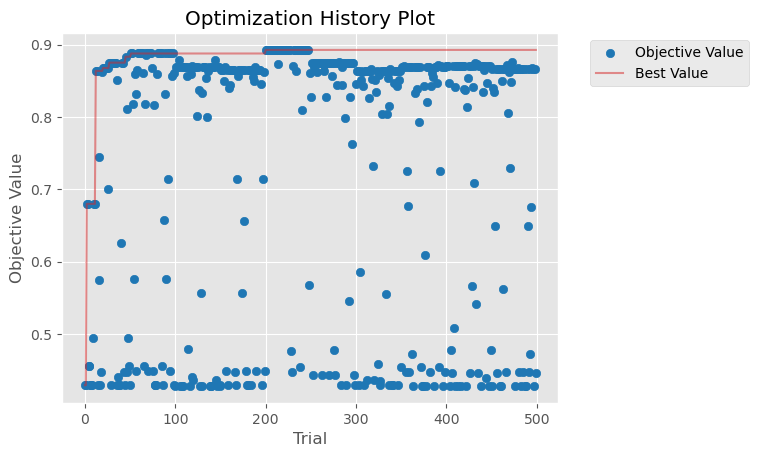

In [154]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_svm);

In [155]:
#from optuna.visualization.matplotlib import plot_param_importances

#plot_param_importances(study_svm);

In [156]:
detailed_objective_svm_cv(study_svm.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,TP,26.900000,2.282786
1,TN,95.700000,2.983287
2,FP,4.800000,3.047768
3,FN,6.500000,2.223611
4,Accuracy,0.915621,0.032414
5,Precision,0.853409,0.089281
6,Sensitivity,0.805406,0.066891
7,Specificity,0.952280,0.030256
8,F1 score,0.826886,0.065757
9,F1 score (weighted),0.914947,0.032340


In [157]:
mat_met_svm_test['ave'] = mat_met_svm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_svm_test['std'] = mat_met_svm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_svm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,TP,46.000000,50.000000,51.000000,50.000000,44.000000,56.000000,57.000000,52.000000,53.000000,53.000000,51.200000,4.022161
1,TN,194.000000,185.000000,190.000000,190.000000,188.000000,192.000000,195.000000,192.000000,199.000000,193.000000,191.800000,3.881580
2,FP,5.000000,15.000000,11.000000,9.000000,12.000000,8.000000,5.000000,9.000000,3.000000,8.000000,8.500000,3.597839
3,FN,23.000000,18.000000,16.000000,19.000000,24.000000,12.000000,11.000000,15.000000,13.000000,14.000000,16.500000,4.453463
4,Accuracy,0.895522,0.876866,0.899254,0.895522,0.865672,0.925373,0.940299,0.910448,0.940299,0.917910,0.906716,0.025000
5,Precision,0.901961,0.769231,0.822581,0.847458,0.785714,0.875000,0.919355,0.852459,0.946429,0.868852,0.858904,0.056191
6,Sensitivity,0.666667,0.735294,0.761194,0.724638,0.647059,0.823529,0.838235,0.776119,0.803030,0.791045,0.756681,0.063640
7,Specificity,0.974900,0.925000,0.945300,0.954800,0.940000,0.960000,0.975000,0.955200,0.985100,0.960200,0.957550,0.017976
8,F1 score,0.766667,0.751880,0.790698,0.781250,0.709677,0.848485,0.876923,0.812500,0.868852,0.828125,0.803506,0.053599
9,F1 score (weighted),0.889947,0.875935,0.897920,0.892722,0.861128,0.924612,0.939362,0.909007,0.938573,0.916590,0.904580,0.025902


In [158]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)


Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_svm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_svm = SVC(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )


        #learn
        
        optimizedCV_svm.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_svm = optimizedCV_svm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_svm': y_pred_optimized_svm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        
        conf_matrix = confusion_matrix(y_test, y_pred_optimized_svm)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        Accuracy_outer.append(accuracy_score(y_test, y_pred_optimized_svm))
        Precision_outer.append(precision_score(y_test, y_pred_optimized_svm))
        Sensitivity_outer.append(recall_score(y_test, y_pred_optimized_svm))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test, y_pred_optimized_svm))
        f1_scores_W_outer.append(f1_score(y_test, y_pred_optimized_svm, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test, y_pred_optimized_svm, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test, y_pred_optimized_svm))
        MCC_outer.append(matthews_corrcoef(y_test, y_pred_optimized_svm))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test, y_pred_optimized_svm))
        
    data_svm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_svm['y_test' + str(i)] = data_inner['y_test']
    data_svm['y_pred_svm' + str(i)] = data_inner['y_pred_svm']
   # data_svm['correct' + str(i)] = correct_value
   # data_svm['pred' + str(i)] = y_pred_optimized_svm

mat_met_optimized_svm = pd.DataFrame({'Metric':['Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[ np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [ np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 

mat_met_optimized_svm

,Metric,Value (average),Value (std)
0,Accuracy,0.911573,0.023640
1,Precision,0.845996,0.055761
2,Sensitivity,0.792287,0.071779
3,Specificity,0.951274,0.020460
4,F1 score,0.816262,0.052000
5,F1 score (weighted),0.910440,0.024245
6,F1 score (macro),0.878984,0.033509
7,Balanced Accuracy,0.871778,0.037523
8,MCC,0.760500,0.065620
9,NPV,0.932758,0.021634


In [159]:
#cross valide using this optimized SVC 
svm_baseline_CVscore = cross_val_score(svm_clf, X, Y, cv=10, scoring="f1_macro")
#cv_svm_opt_testSet = cross_val_score(optimized_svm, X, Y, cv=10, scoring="f1_macro")
cv_svm_opt = cross_val_score(optimizedCV_svm, X, Y, cv=10, scoring="f1_macro")
print("SVM baseline model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(svm_baseline_CVscore), np.std(svm_baseline_CVscore, ddof=1)))
#print("SVM optimized model (tested on Y_te) f1_score %0.4f with a standard deviation of %0.4f" % (svm_baseline_CVscore.mean(), svm_baseline_CVscore.std()))
print("SVM optimized model f1_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_svm_opt), np.std(cv_svm_opt, ddof=1)))

SVM baseline model f1_score 0.8468 with a standard deviation of 0.0377
SVM optimized model f1_score 0.8844 with a standard deviation of 0.0306


In [160]:
joblib.dump(svm_clf, "OUTPUT/svm_clf.joblib")
#joblib.dump(optimized_svm, "OUTPUT/optimized_svm.joblib")
joblib.dump(optimizedCV_svm, "OUTPUT/optimizedCV_svm_clf.joblib")

['OUTPUT/optimizedCV_svm_clf.joblib']

In [161]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/TestSet_EvaluationResults.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    mat_met_rf_test.to_excel(writer, sheet_name="RF", )
    mat_met_lgbm_test.to_excel(writer, sheet_name="LGBM", )
    mat_met_xgb_test.to_excel(writer, sheet_name="XGB", )
    mat_met_knn_test.to_excel(writer, sheet_name="KNN", )
    mat_met_svm_test.to_excel(writer, sheet_name="SVM", )

In [162]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/EvaluationResults.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    mat_met_optimized_rf.to_excel(writer, sheet_name="RF", )
    mat_met_optimized_lgbm.to_excel(writer, sheet_name="LGBM", )
    mat_met_optimized_xgb.to_excel(writer, sheet_name="XGB", )
    mat_met_optimized_knn.to_excel(writer, sheet_name="KNN", )
    mat_met_optimized_svm.to_excel(writer, sheet_name="SVM", )